In [2]:
import sys
import os

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))
# sys.path.append('..')
# sys.path.append('../models')
from NN_TopOpt import FeatureMappingDecSDF, FeatureMappingTopOpt, SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "fm_nn_heaviside": FeatureMappingTopOpt,
}

In [6]:
import torch 
torch.cuda.empty_cache()

# select the experiment directory
# experiment_dir = "../configs/NN_top_optimization/FM_NN_Heaviside/AE_DeepSDF"
experiment_dir = "../configs/NN_top_optimization/FM_NN_Heaviside/VAE_DeepSDF"
# experiment_dir = "../configs/NN_top_optimization/FM_NN_Heaviside/MMD_VAE_DeepSDF"

# config_name = "MBB_beam_half_fm_ae_hv" #
# config_name = "Cant_beam_half_fm_ae_hv"
# config_name = "Cant_beam_distrL_fm_ae_hv"
# config_name = "Brecket_fm_ae_hv"


gamma_ks_list = [2, 5, 7, 10, 20, 30, 40, 60, 80, 100]

In [4]:
def gamma_ks_experiment(gamma_ks, methods, params, src_dir='../src/gamma_ks_test'):
    params['ks_smooth_factor'] = gamma_ks
    TopOptimizer = TopOptimizer2D(methods, params)
    TopOptimizer.optimize(plot_interval=20)
    vf, compliance, max_stress = TopOptimizer.print_metrics()

    geometry_features = TopOptimizer.method.gaussian_core.get_geometry()
    H_min = TopOptimizer.method.gaussian_core.H_min
    H_max = TopOptimizer.method.gaussian_core.H_max

    filename = f'{src_dir}/gamma_ks_{gamma_ks}.png'
    TopOptimizer.plot_final_result(geometry_features, filename=filename, plot_von_mises=True)

    return vf, compliance, max_stress, filename, H_min, H_max

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 226426.88it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 21393.66it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
2
Iteration: 1 | current volfrac: 0.273691 | compliance: 0.133854
Iteration: 2 | current volfrac: 0.275229 | compliance: 0.034038
Iteration: 3 | current volfrac: 0.276363 | compliance: 0.086903
Iteration: 4 | current volfrac: 0.277182 | compliance: 0.057384
Iteration: 5 | current volfrac: 0.278004 | compliance: 0.057873
Iteration: 6 | current volfrac: 0.278647 | compliance: 0.032936
Iteration: 7 | current volfrac: 0.279329 | compliance: 0.095593
Iteration: 8 | current volfrac: 0.279970 | compliance: 0.164520
Iteration: 9 | current volfrac: 0.280547 | compliance: 0.083526
Iteration: 10 | current volfrac: 0.281206 | compliance: 0.177980
Iteration: 11 | current volfrac: 0.281754 | compliance: 0.034285
Iteration: 12 | current volfrac: 0.282257 | compliance: 0.032696
Iteration: 13 | current volfrac: 0.282645 | compliance: 0.123860
Iteration: 14 | current volfrac: 0.283079 | compliance: 0.13122

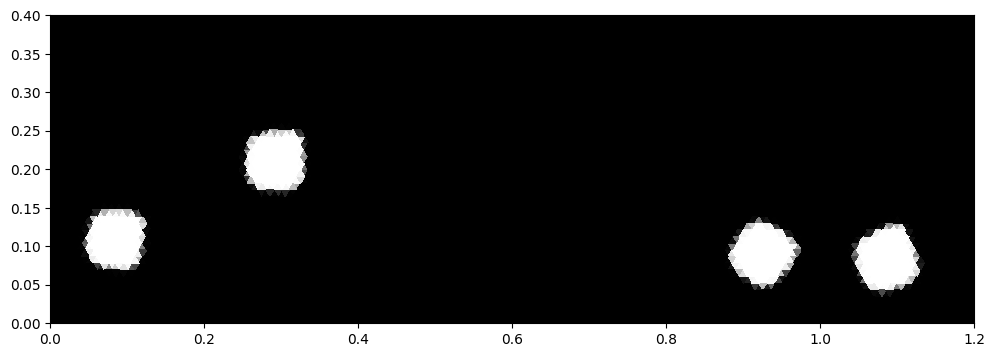

Iteration: 20 | current volfrac: 0.285575 | compliance: 0.040159
Iteration: 21 | current volfrac: 0.285913 | compliance: 0.037082
Iteration: 22 | current volfrac: 0.286245 | compliance: 0.429642
Iteration: 23 | current volfrac: 0.286601 | compliance: 0.045464
Iteration: 24 | current volfrac: 0.286778 | compliance: 0.121659
Iteration: 25 | current volfrac: 0.287004 | compliance: 0.050150
Iteration: 26 | current volfrac: 0.287172 | compliance: 3.209472
Iteration: 27 | current volfrac: 0.287414 | compliance: 0.054600
Iteration: 28 | current volfrac: 0.287553 | compliance: 0.249969
Iteration: 29 | current volfrac: 0.287814 | compliance: 4.363017
Iteration: 30 | current volfrac: 0.287939 | compliance: 6.295898
Iteration: 31 | current volfrac: 0.288108 | compliance: 0.433909
Iteration: 32 | current volfrac: 0.288222 | compliance: 0.059283
Iteration: 33 | current volfrac: 0.288385 | compliance: 21.022476
Iteration: 34 | current volfrac: 0.288531 | compliance: 0.069321
Iteration: 35 | current 

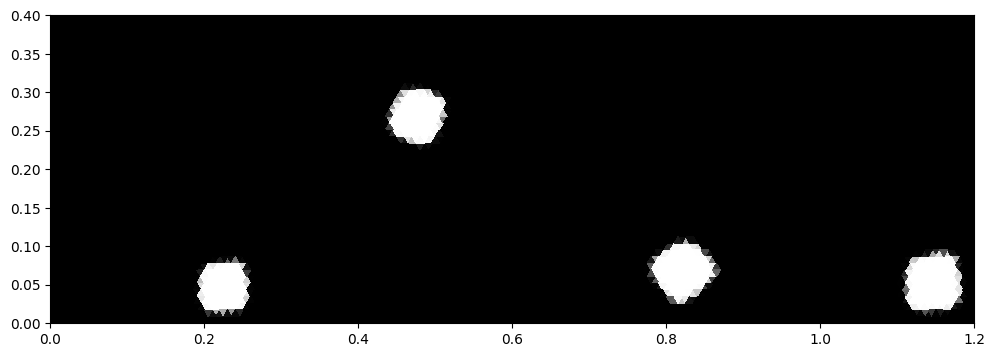

Iteration: 40 | current volfrac: 0.289380 | compliance: 0.250069
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.289918 | compliance: 0.212284
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.290343 | compliance: 0.499807
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.290897 | compliance: 0.324274
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.291466 | compliance: 6.908868
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.292021 | compliance: 0.723149
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.292600 | compliance: 12.527117
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.293093 | 

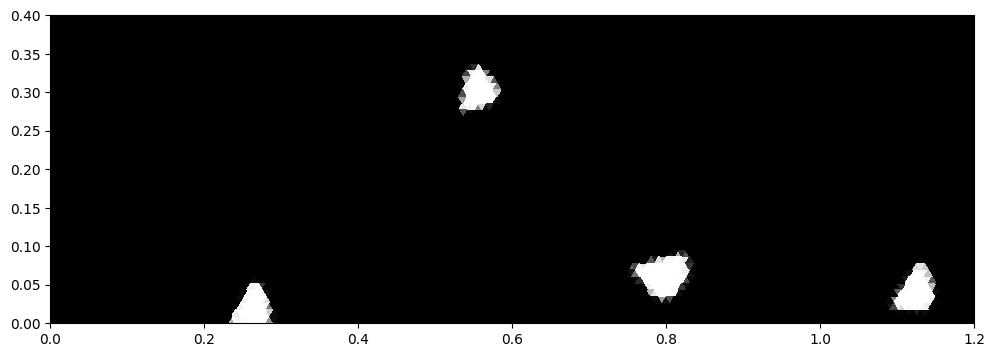

Iteration: 60 | current volfrac: 0.297585 | compliance: 0.155832
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.297736 | compliance: 0.091583
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.297889 | compliance: 0.080907
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.297971 | compliance: 0.080984
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.298267 | compliance: 0.069596
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.298409 | compliance: 0.266294
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.298507 | compliance: 0.357604
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.298620 | c

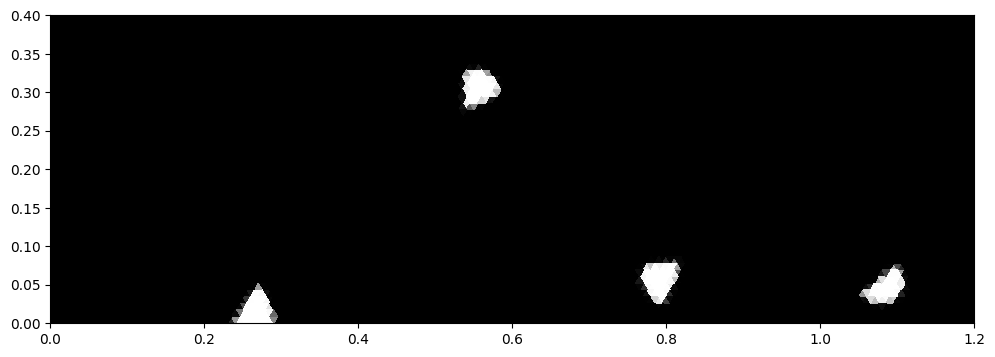

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 98728.23it/s]


203.24716763030466 0.001534825401194536


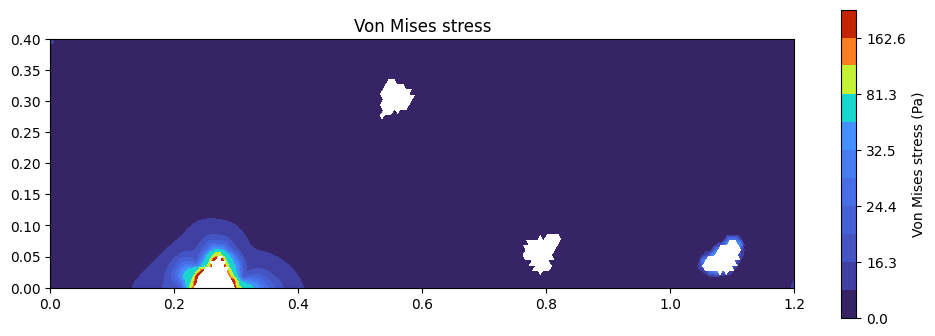

vf: 0.299782 | compliance: -0.000874 | max_stress: 824.881538
203.24716763030466 0.001534825401194536


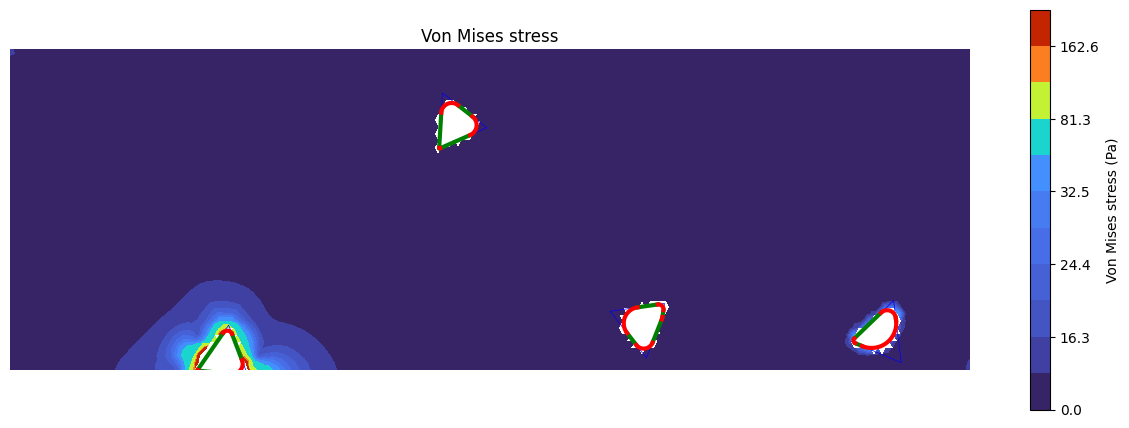

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 222268.63it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 21008.29it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
5
Iteration: 1 | current volfrac: 0.672517 | compliance: 0.002029
Iteration: 2 | current volfrac: 0.671279 | compliance: 0.002027
Iteration: 3 | current volfrac: 0.669350 | compliance: 0.002026
Iteration: 4 | current volfrac: 0.667328 | compliance: 0.002030
Iteration: 5 | current volfrac: 0.664934 | compliance: 0.002036
Iteration: 6 | current volfrac: 0.662108 | compliance: 0.002039
Iteration: 7 | current volfrac: 0.659138 | compliance: 0.002043
Iteration: 8 | current volfrac: 0.655773 | compliance: 0.002048
Iteration: 9 | current volfrac: 0.652139 | compliance: 0.002053
Iteration: 10 | current volfrac: 0.648292 | compliance: 0.002059
Iteration: 11 | current volfrac: 0.644180 | compliance: 0.002061
Iteration: 12 | current volfrac: 0.639825 | compliance: 0.002065
Iteration: 13 | current volfrac: 0.635117 | compliance: 0.002071
Iteration: 14 | current volfrac: 0.630051 | compliance: 0.00208

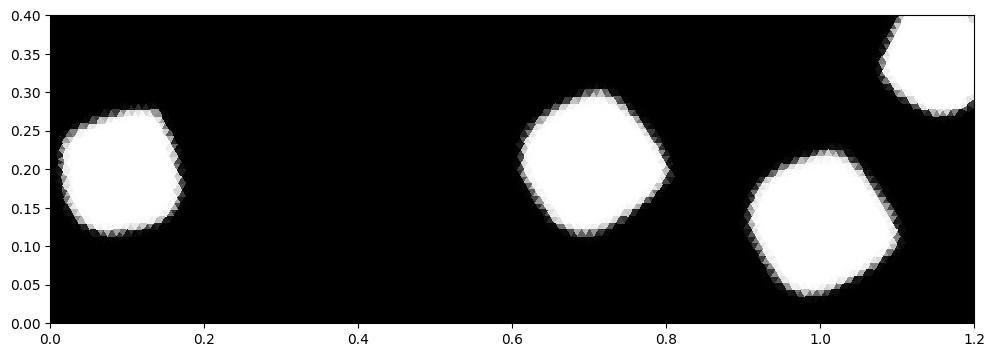

Iteration: 20 | current volfrac: 0.596514 | compliance: 0.002165
Iteration: 21 | current volfrac: 0.596414 | compliance: 0.002164
Iteration: 22 | current volfrac: 0.595399 | compliance: 0.002166
Iteration: 23 | current volfrac: 0.593490 | compliance: 0.002170
Iteration: 24 | current volfrac: 0.590844 | compliance: 0.002177
Iteration: 25 | current volfrac: 0.587665 | compliance: 0.002182
Iteration: 26 | current volfrac: 0.584046 | compliance: 0.002188
Iteration: 27 | current volfrac: 0.580035 | compliance: 0.002197
Iteration: 28 | current volfrac: 0.575722 | compliance: 0.002209
Iteration: 29 | current volfrac: 0.571280 | compliance: 0.002218
Iteration: 30 | current volfrac: 0.566965 | compliance: 0.002228
Iteration: 31 | current volfrac: 0.562839 | compliance: 0.002242
Iteration: 32 | current volfrac: 0.559056 | compliance: 0.002257
Iteration: 33 | current volfrac: 0.556122 | compliance: 0.002265
Iteration: 34 | current volfrac: 0.554164 | compliance: 0.002266
Iteration: 35 | current v

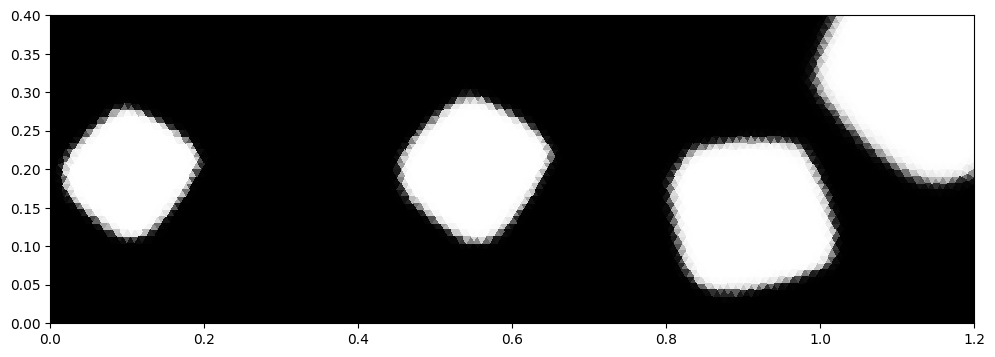

Iteration: 40 | current volfrac: 0.547144 | compliance: 0.002275
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.542179 | compliance: 0.002280
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.536134 | compliance: 0.002291
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.530250 | compliance: 0.002301
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.525807 | compliance: 0.002323
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.520687 | compliance: 0.002325
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.515196 | compliance: 0.002336
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.507869 | c

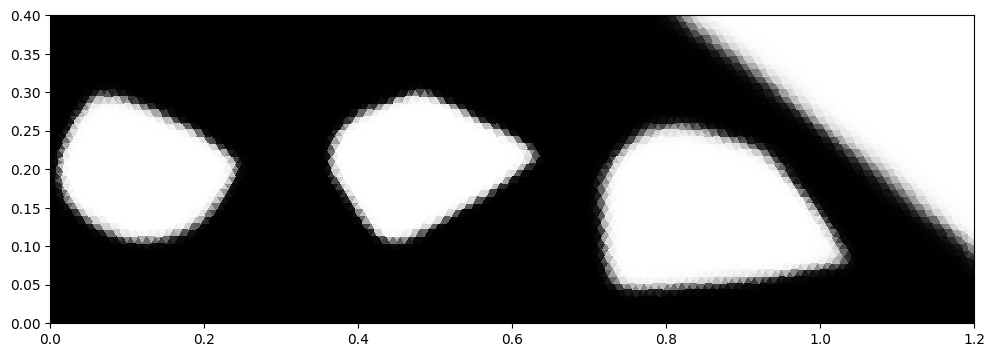

Iteration: 60 | current volfrac: 0.466882 | compliance: 0.002528
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.460915 | compliance: 0.002561
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.465874 | compliance: 0.002522
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.473048 | compliance: 0.002478
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.480976 | compliance: 0.002467
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.476170 | compliance: 0.002476
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.467104 | compliance: 0.002510
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.457212 | c

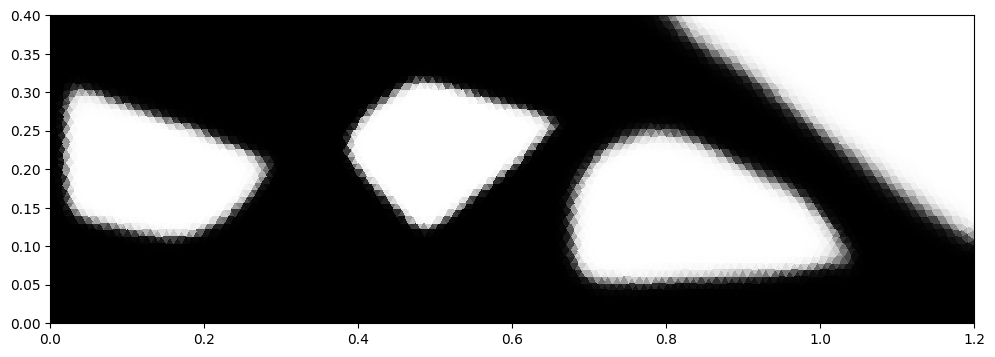

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 109028.19it/s]


1.281197102250681 0.007148426034739586


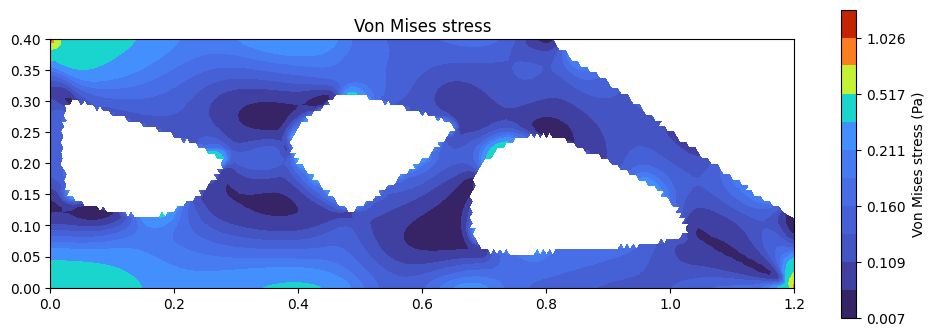

vf: 0.459180 | compliance: 0.002537 | max_stress: 1.281197
1.281197102250681 0.007148426034739586


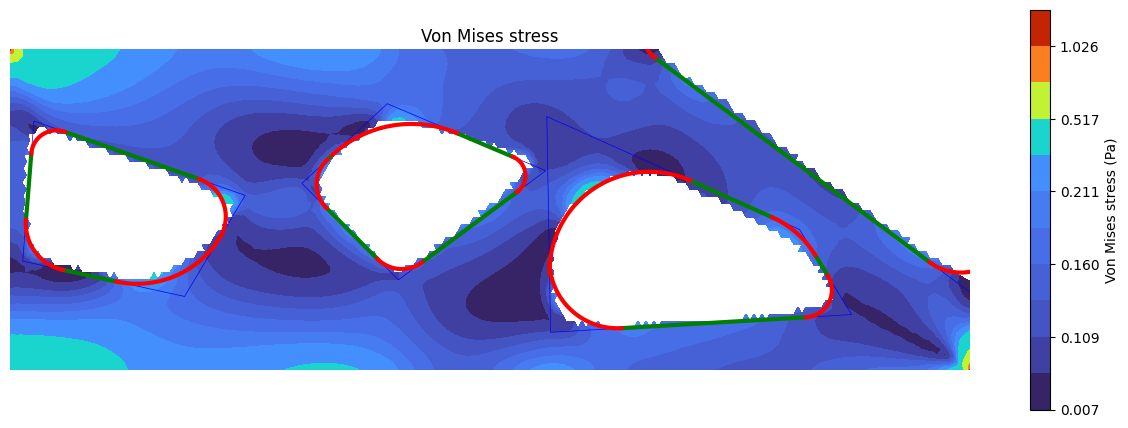

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 217066.47it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 21303.93it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
7
Iteration: 1 | current volfrac: 0.746353 | compliance: 0.001485
Iteration: 2 | current volfrac: 0.743648 | compliance: 0.001488
Iteration: 3 | current volfrac: 0.740854 | compliance: 0.001489
Iteration: 4 | current volfrac: 0.737777 | compliance: 0.001494
Iteration: 5 | current volfrac: 0.734456 | compliance: 0.001501
Iteration: 6 | current volfrac: 0.730900 | compliance: 0.001509
Iteration: 7 | current volfrac: 0.727311 | compliance: 0.001505
Iteration: 8 | current volfrac: 0.723289 | compliance: 0.001504
Iteration: 9 | current volfrac: 0.718929 | compliance: 0.001506
Iteration: 10 | current volfrac: 0.714125 | compliance: 0.001509
Iteration: 11 | current volfrac: 0.708942 | compliance: 0.001515
Iteration: 12 | current volfrac: 0.703276 | compliance: 0.001523
Iteration: 13 | current volfrac: 0.697438 | compliance: 0.001530
Iteration: 14 | current volfrac: 0.691426 | compliance: 0.00153

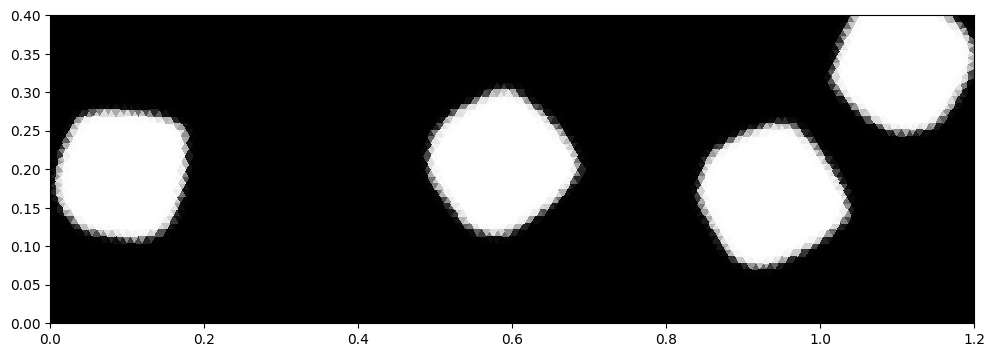

Iteration: 20 | current volfrac: 0.639308 | compliance: 0.001626
Iteration: 21 | current volfrac: 0.627790 | compliance: 0.001657
Iteration: 22 | current volfrac: 0.615652 | compliance: 0.001688
Iteration: 23 | current volfrac: 0.603526 | compliance: 0.001716
Iteration: 24 | current volfrac: 0.591553 | compliance: 0.001752
Iteration: 25 | current volfrac: 0.579136 | compliance: 0.001798
Iteration: 26 | current volfrac: 0.566399 | compliance: 0.001848
Iteration: 27 | current volfrac: 0.566112 | compliance: 0.001840
Iteration: 28 | current volfrac: 0.571625 | compliance: 0.001816
Iteration: 29 | current volfrac: 0.575301 | compliance: 0.001799
Iteration: 30 | current volfrac: 0.577193 | compliance: 0.001790
Iteration: 31 | current volfrac: 0.577736 | compliance: 0.001787
Iteration: 32 | current volfrac: 0.577295 | compliance: 0.001784
Iteration: 33 | current volfrac: 0.575953 | compliance: 0.001781
Iteration: 34 | current volfrac: 0.573618 | compliance: 0.001784
Iteration: 35 | current v

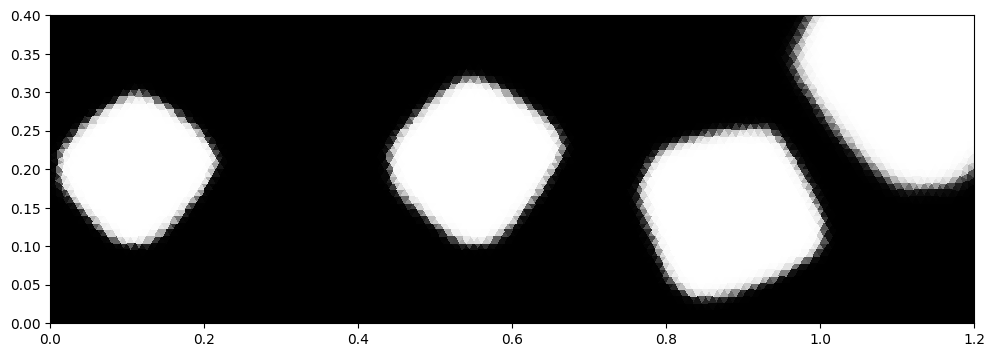

Iteration: 40 | current volfrac: 0.564957 | compliance: 0.001811
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.560416 | compliance: 0.001811
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.554009 | compliance: 0.001817
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.546243 | compliance: 0.001829
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.540537 | compliance: 0.001860
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.534152 | compliance: 0.001859
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.525911 | compliance: 0.001876
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.513876 | c

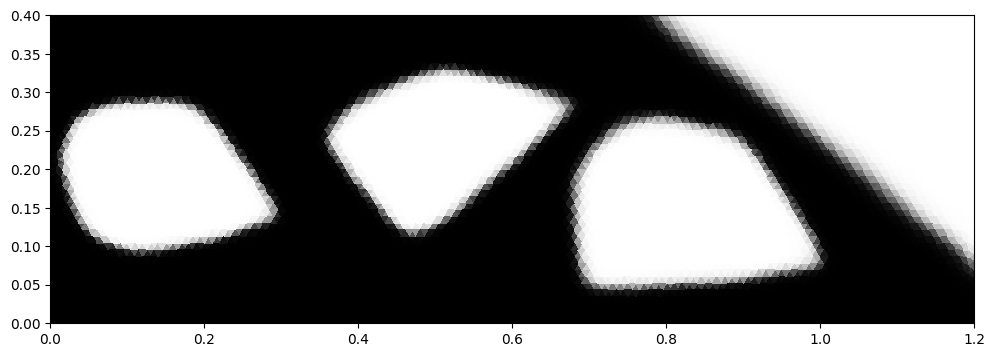

Iteration: 60 | current volfrac: 0.469648 | compliance: 0.002069
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.460508 | compliance: 0.002110
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.456001 | compliance: 0.002136
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.457692 | compliance: 0.002107
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.454715 | compliance: 0.002156
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.452027 | compliance: 0.002159
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.448483 | compliance: 0.002168
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.449124 | c

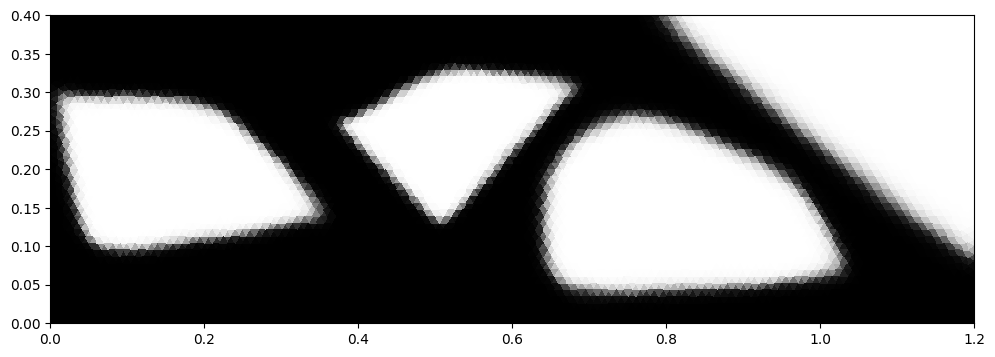

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 99952.30it/s] 


0.9381590473394932 0.004070606223932484


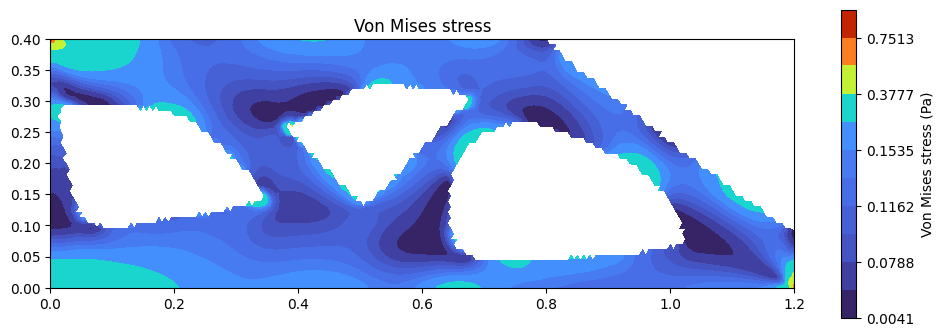

vf: 0.444225 | compliance: 0.002160 | max_stress: 0.938159
0.9381590473394932 0.004070606223932484


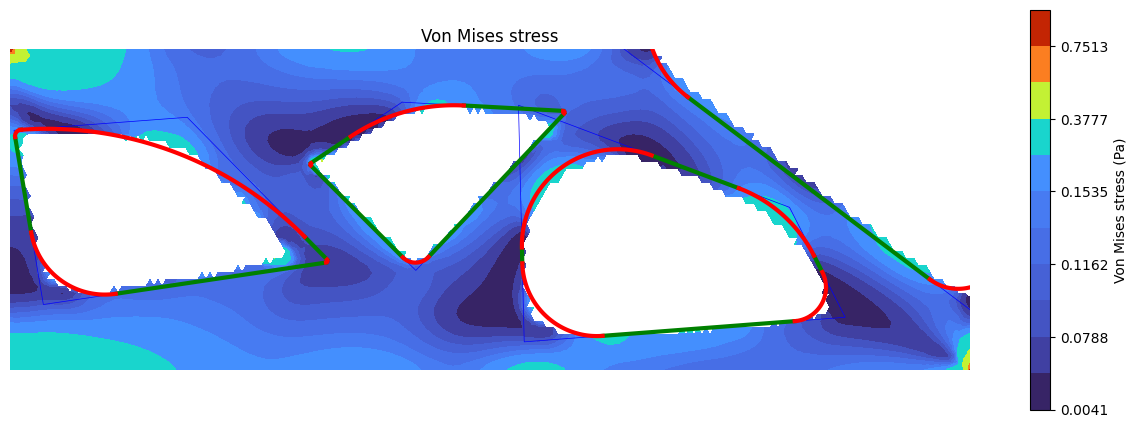

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 216597.81it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 32843.12it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
10
Iteration: 1 | current volfrac: 0.801455 | compliance: 0.001199
Iteration: 2 | current volfrac: 0.798864 | compliance: 0.001204
Iteration: 3 | current volfrac: 0.795424 | compliance: 0.001205
Iteration: 4 | current volfrac: 0.791990 | compliance: 0.001207
Iteration: 5 | current volfrac: 0.788433 | compliance: 0.001210
Iteration: 6 | current volfrac: 0.784440 | compliance: 0.001212
Iteration: 7 | current volfrac: 0.780216 | compliance: 0.001213
Iteration: 8 | current volfrac: 0.775577 | compliance: 0.001215
Iteration: 9 | current volfrac: 0.770556 | compliance: 0.001219
Iteration: 10 | current volfrac: 0.765222 | compliance: 0.001222
Iteration: 11 | current volfrac: 0.759423 | compliance: 0.001225
Iteration: 12 | current volfrac: 0.752928 | compliance: 0.001229
Iteration: 13 | current volfrac: 0.745895 | compliance: 0.001233
Iteration: 14 | current volfrac: 0.738234 | compliance: 0.0012

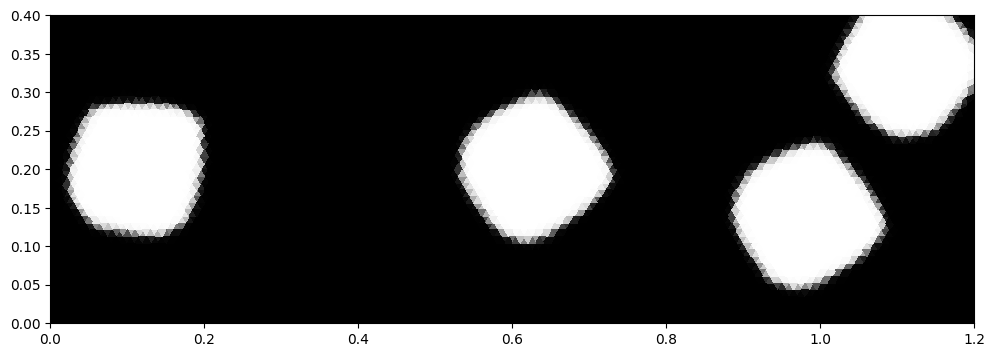

Iteration: 20 | current volfrac: 0.681026 | compliance: 0.001324
Iteration: 21 | current volfrac: 0.667719 | compliance: 0.001352
Iteration: 22 | current volfrac: 0.653403 | compliance: 0.001381
Iteration: 23 | current volfrac: 0.638199 | compliance: 0.001418
Iteration: 24 | current volfrac: 0.621661 | compliance: 0.001462
Iteration: 25 | current volfrac: 0.603769 | compliance: 0.001513
Iteration: 26 | current volfrac: 0.585402 | compliance: 0.001577
Iteration: 27 | current volfrac: 0.569467 | compliance: 0.001631
Iteration: 28 | current volfrac: 0.569061 | compliance: 0.001627
Iteration: 29 | current volfrac: 0.568250 | compliance: 0.001634
Iteration: 30 | current volfrac: 0.566273 | compliance: 0.001645
Iteration: 31 | current volfrac: 0.563408 | compliance: 0.001655
Iteration: 32 | current volfrac: 0.559986 | compliance: 0.001663
Iteration: 33 | current volfrac: 0.556660 | compliance: 0.001670
Iteration: 34 | current volfrac: 0.554106 | compliance: 0.001681
Iteration: 35 | current v

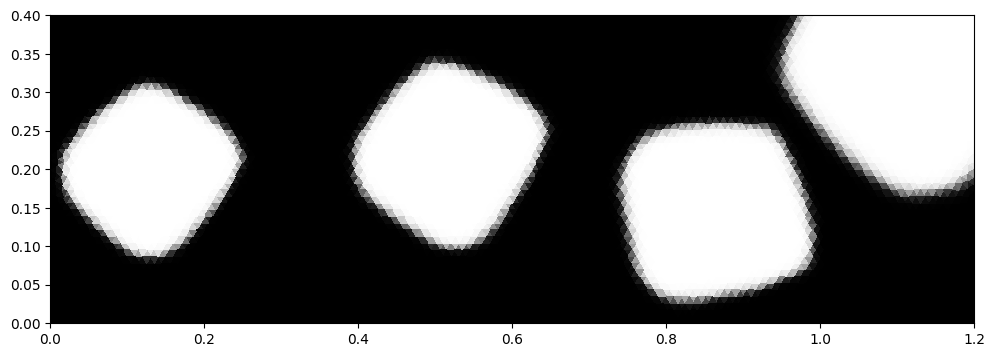

Iteration: 40 | current volfrac: 0.554532 | compliance: 0.001651
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.550274 | compliance: 0.001646
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.547623 | compliance: 0.001629
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.542303 | compliance: 0.001626
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.536422 | compliance: 0.001651
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.528536 | compliance: 0.001655
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.518282 | compliance: 0.001680
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.504898 | c

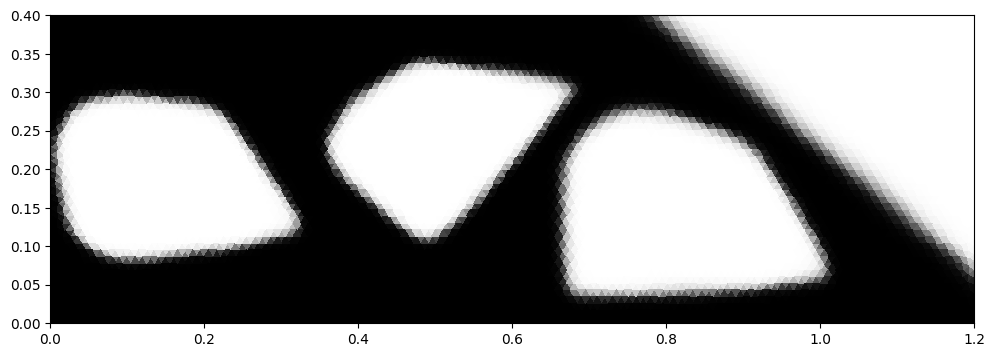

Iteration: 60 | current volfrac: 0.453073 | compliance: 0.001892
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.446616 | compliance: 0.001913
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.443107 | compliance: 0.001921
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.444170 | compliance: 0.001901
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.440159 | compliance: 0.001962
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.443842 | compliance: 0.001914
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.444814 | compliance: 0.001899
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.444655 | c

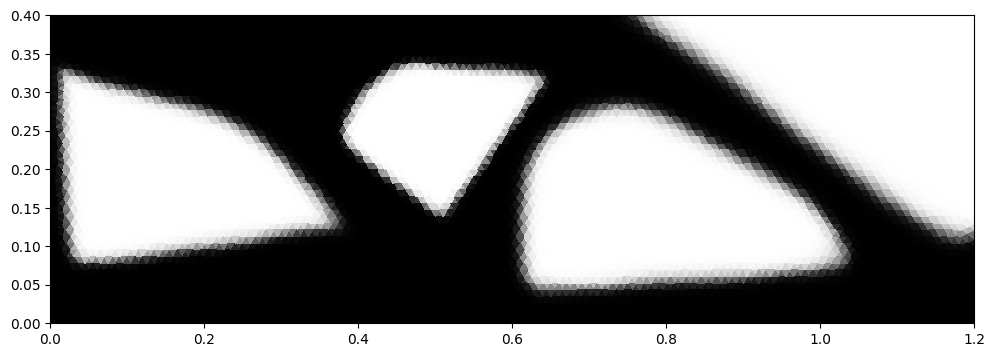

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 112028.73it/s]


0.7568596532487716 0.002720189424162799


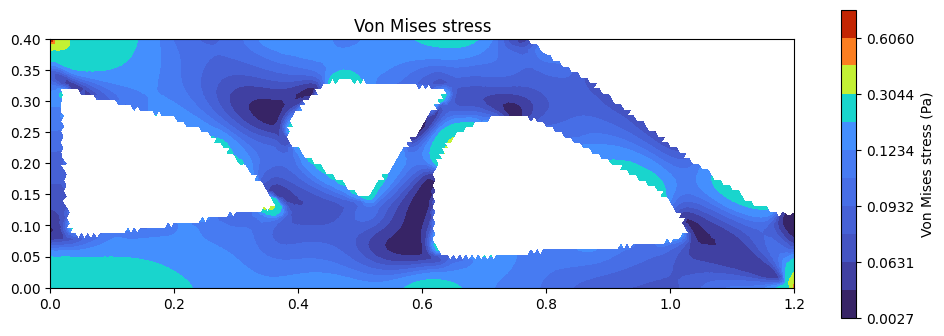

vf: 0.455843 | compliance: 0.001808 | max_stress: 0.756860
0.7568596532487716 0.002720189424162799


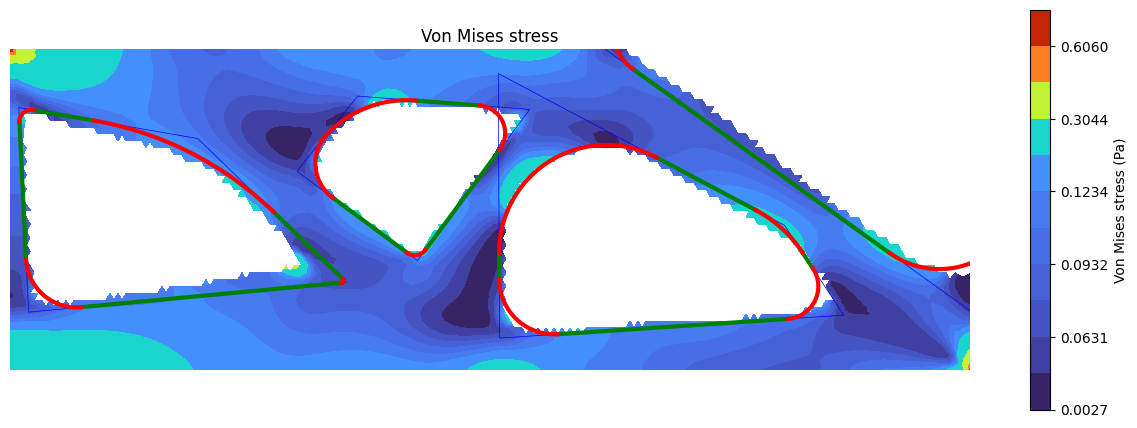

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 215274.55it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 33438.06it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
20
Iteration: 1 | current volfrac: 0.865542 | compliance: 0.000951
Iteration: 2 | current volfrac: 0.862711 | compliance: 0.000955
Iteration: 3 | current volfrac: 0.858768 | compliance: 0.000959
Iteration: 4 | current volfrac: 0.855080 | compliance: 0.000959
Iteration: 5 | current volfrac: 0.851131 | compliance: 0.000962
Iteration: 6 | current volfrac: 0.846895 | compliance: 0.000963
Iteration: 7 | current volfrac: 0.842325 | compliance: 0.000964
Iteration: 8 | current volfrac: 0.837233 | compliance: 0.000964
Iteration: 9 | current volfrac: 0.831908 | compliance: 0.000965
Iteration: 10 | current volfrac: 0.826578 | compliance: 0.000966
Iteration: 11 | current volfrac: 0.820386 | compliance: 0.000968
Iteration: 12 | current volfrac: 0.813216 | compliance: 0.000973
Iteration: 13 | current volfrac: 0.805217 | compliance: 0.000981
Iteration: 14 | current volfrac: 0.796599 | compliance: 0.0009

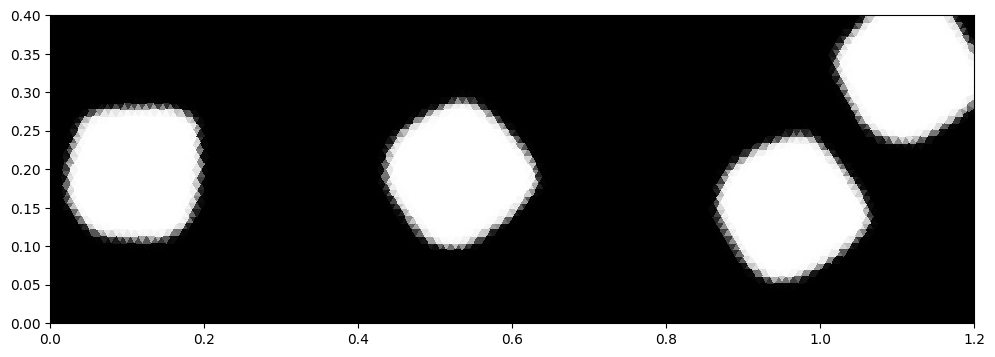

Iteration: 20 | current volfrac: 0.732298 | compliance: 0.001054
Iteration: 21 | current volfrac: 0.717291 | compliance: 0.001075
Iteration: 22 | current volfrac: 0.700609 | compliance: 0.001102
Iteration: 23 | current volfrac: 0.682241 | compliance: 0.001138
Iteration: 24 | current volfrac: 0.662310 | compliance: 0.001185
Iteration: 25 | current volfrac: 0.640721 | compliance: 0.001242
Iteration: 26 | current volfrac: 0.618488 | compliance: 0.001323
Iteration: 27 | current volfrac: 0.599717 | compliance: 0.001382
Iteration: 28 | current volfrac: 0.584578 | compliance: 0.001421
Iteration: 29 | current volfrac: 0.569655 | compliance: 0.001478
Iteration: 30 | current volfrac: 0.556394 | compliance: 0.001547
Iteration: 31 | current volfrac: 0.561226 | compliance: 0.001536
Iteration: 32 | current volfrac: 0.564989 | compliance: 0.001515
Iteration: 33 | current volfrac: 0.567277 | compliance: 0.001494
Iteration: 34 | current volfrac: 0.567945 | compliance: 0.001477
Iteration: 35 | current v

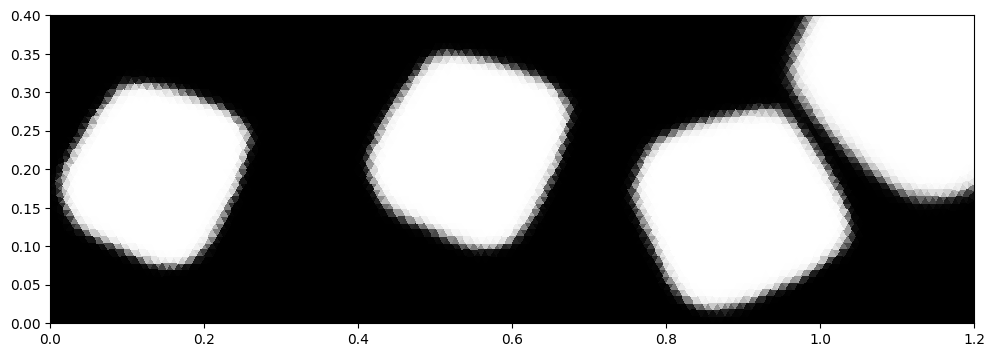

Iteration: 40 | current volfrac: 0.567293 | compliance: 0.001460
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.572510 | compliance: 0.001401
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.574322 | compliance: 0.001368
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.569795 | compliance: 0.001365
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.564527 | compliance: 0.001389
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.550204 | compliance: 0.001418
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.535545 | compliance: 0.001453
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.521496 | c

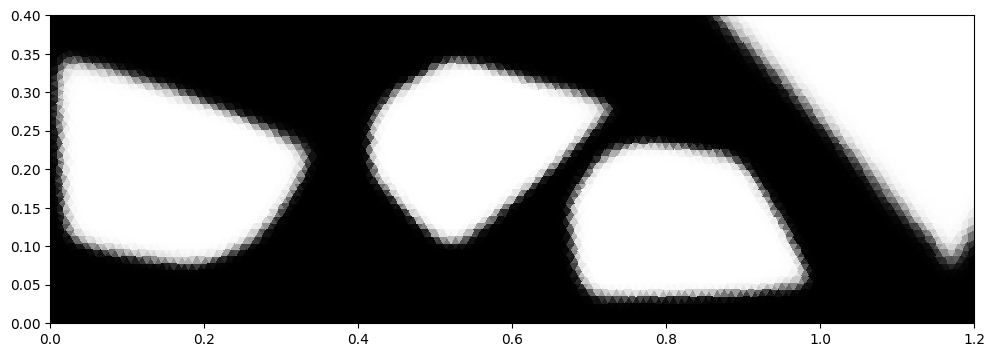

Iteration: 60 | current volfrac: 0.524874 | compliance: 0.001472
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.509886 | compliance: 0.001499
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.492225 | compliance: 0.001544
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.472633 | compliance: 0.001616
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.455592 | compliance: 0.001751
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.446056 | compliance: 0.001864
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.455469 | compliance: 0.001705
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.467635 | c

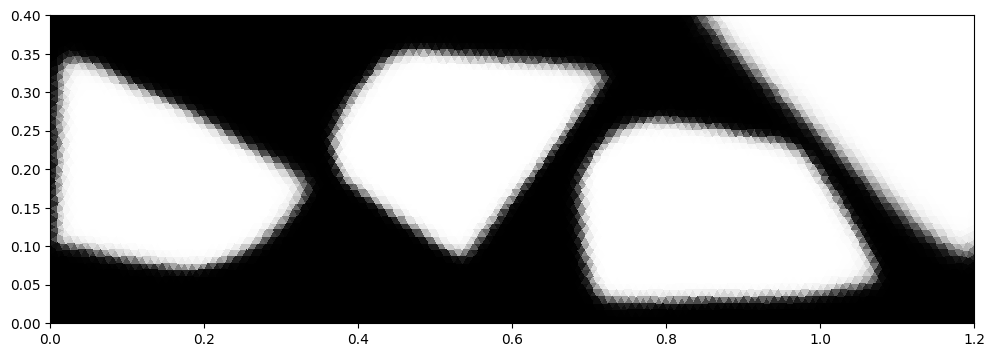

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 107908.01it/s]


0.6001880638532581 0.0036149592745536568


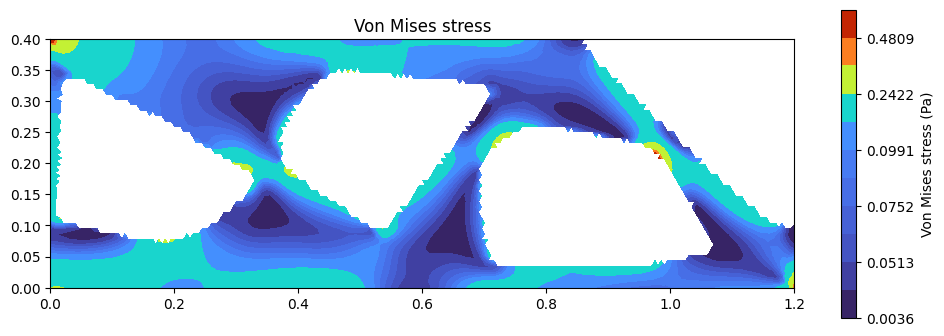

vf: 0.450941 | compliance: 0.001705 | max_stress: 0.663270
0.6001880638532581 0.0036149592745536568


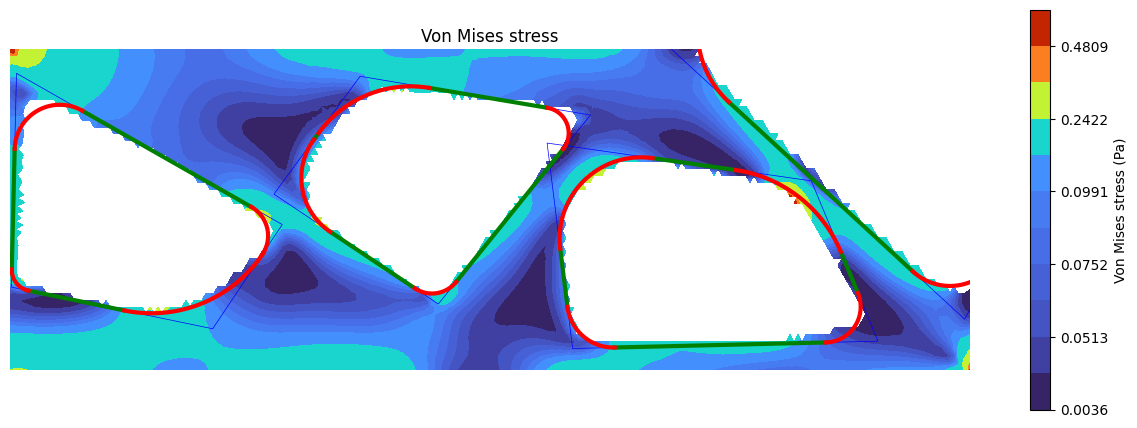

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 216229.56it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 34108.08it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
30
Iteration: 1 | current volfrac: 0.886837 | compliance: 0.000884
Iteration: 2 | current volfrac: 0.883937 | compliance: 0.000887
Iteration: 3 | current volfrac: 0.879915 | compliance: 0.000892
Iteration: 4 | current volfrac: 0.876152 | compliance: 0.000891
Iteration: 5 | current volfrac: 0.872211 | compliance: 0.000894
Iteration: 6 | current volfrac: 0.867564 | compliance: 0.000898
Iteration: 7 | current volfrac: 0.862748 | compliance: 0.000900
Iteration: 8 | current volfrac: 0.857584 | compliance: 0.000902
Iteration: 9 | current volfrac: 0.852064 | compliance: 0.000903
Iteration: 10 | current volfrac: 0.845799 | compliance: 0.000905
Iteration: 11 | current volfrac: 0.839194 | compliance: 0.000909
Iteration: 12 | current volfrac: 0.832023 | compliance: 0.000914
Iteration: 13 | current volfrac: 0.824087 | compliance: 0.000917
Iteration: 14 | current volfrac: 0.815843 | compliance: 0.0009

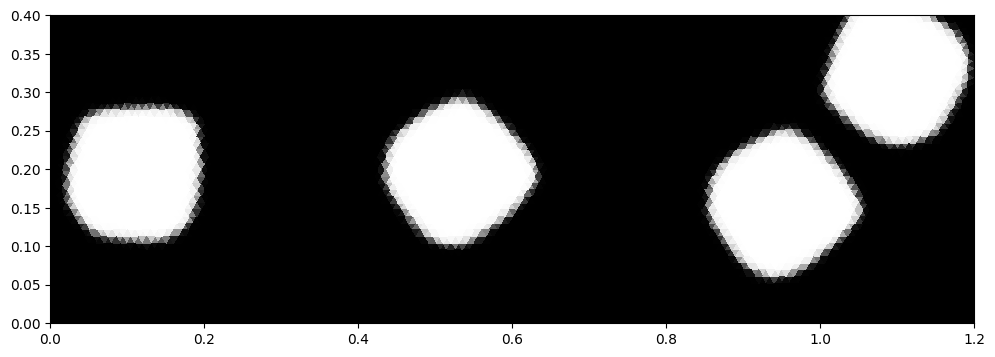

Iteration: 20 | current volfrac: 0.747455 | compliance: 0.000987
Iteration: 21 | current volfrac: 0.731359 | compliance: 0.001011
Iteration: 22 | current volfrac: 0.714453 | compliance: 0.001032
Iteration: 23 | current volfrac: 0.697065 | compliance: 0.001058
Iteration: 24 | current volfrac: 0.677866 | compliance: 0.001097
Iteration: 25 | current volfrac: 0.655924 | compliance: 0.001154
Iteration: 26 | current volfrac: 0.631727 | compliance: 0.001231
Iteration: 27 | current volfrac: 0.611443 | compliance: 0.001288
Iteration: 28 | current volfrac: 0.592269 | compliance: 0.001350
Iteration: 29 | current volfrac: 0.573573 | compliance: 0.001416
Iteration: 30 | current volfrac: 0.555709 | compliance: 0.001504
Iteration: 31 | current volfrac: 0.558260 | compliance: 0.001498
Iteration: 32 | current volfrac: 0.560240 | compliance: 0.001493
Iteration: 33 | current volfrac: 0.561936 | compliance: 0.001471
Iteration: 34 | current volfrac: 0.562003 | compliance: 0.001459
Iteration: 35 | current v

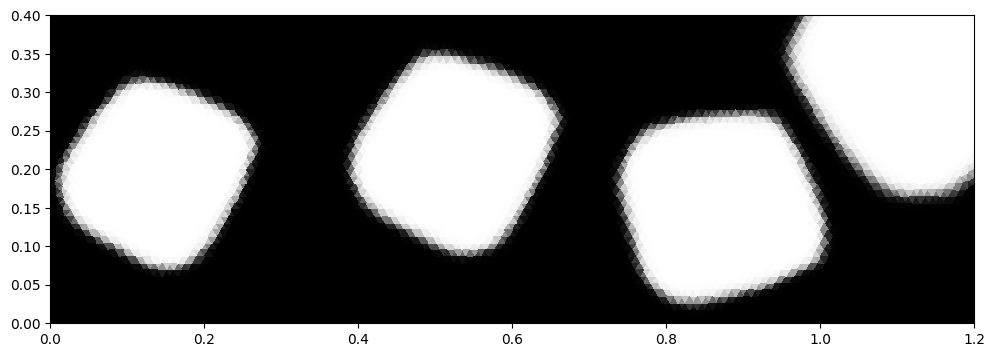

Iteration: 40 | current volfrac: 0.575553 | compliance: 0.001374
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.574669 | compliance: 0.001354
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.569575 | compliance: 0.001343
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.560430 | compliance: 0.001346
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.553356 | compliance: 0.001386
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.544465 | compliance: 0.001376
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.533833 | compliance: 0.001405
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.520801 | c

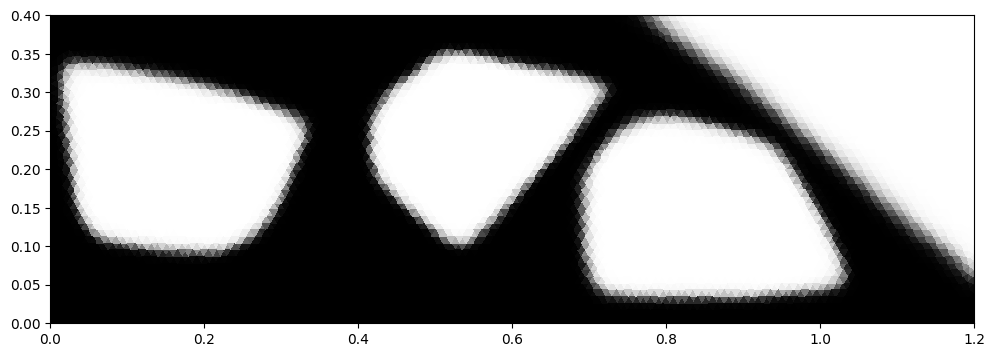

Iteration: 60 | current volfrac: 0.477096 | compliance: 0.001551
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.470558 | compliance: 0.001572
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.467207 | compliance: 0.001564
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.461389 | compliance: 0.001589
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.456325 | compliance: 0.001679
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.453278 | compliance: 0.001664
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.454956 | compliance: 0.001670
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.459943 | c

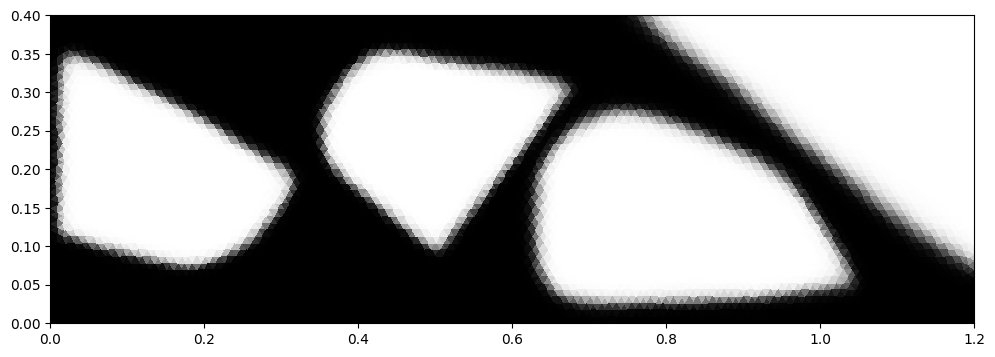

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 87760.58it/s]


0.5579149363450571 0.0017780388062155774


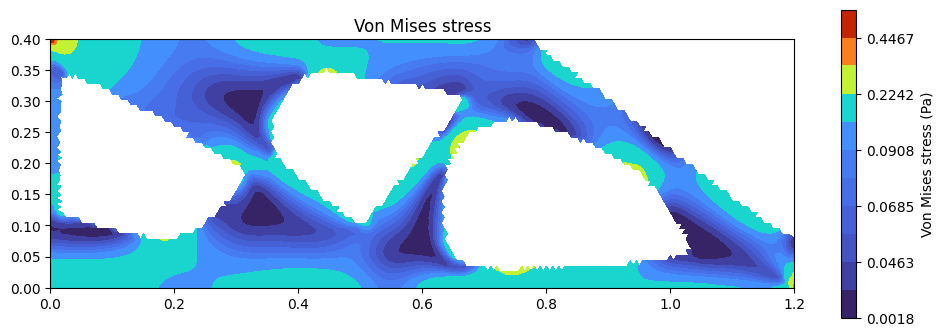

vf: 0.451238 | compliance: 0.001605 | max_stress: 0.557915
0.5579149363450571 0.0017780388062155774


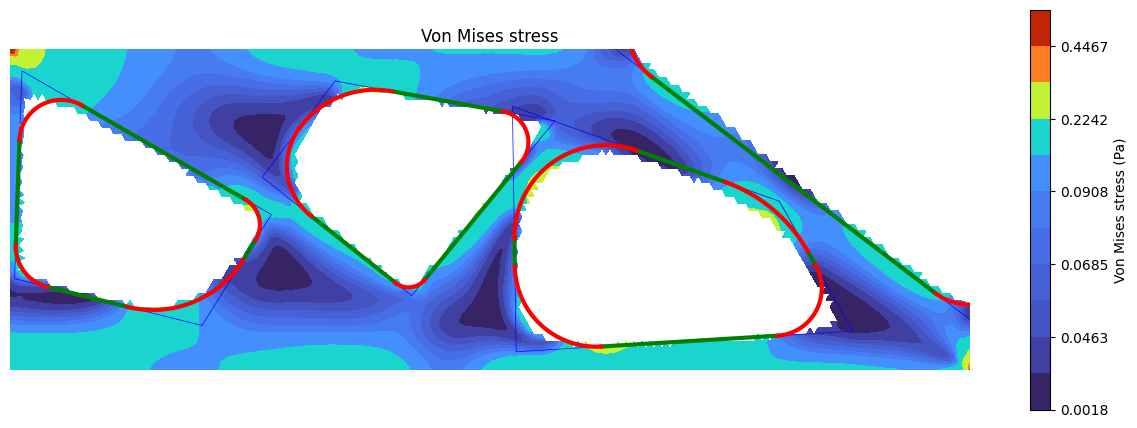

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 221590.39it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 21039.50it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
40
Iteration: 1 | current volfrac: 0.897464 | compliance: 0.000852
Iteration: 2 | current volfrac: 0.894533 | compliance: 0.000856
Iteration: 3 | current volfrac: 0.890477 | compliance: 0.000860
Iteration: 4 | current volfrac: 0.886655 | compliance: 0.000859
Iteration: 5 | current volfrac: 0.882536 | compliance: 0.000862
Iteration: 6 | current volfrac: 0.877967 | compliance: 0.000866
Iteration: 7 | current volfrac: 0.873217 | compliance: 0.000869
Iteration: 8 | current volfrac: 0.867923 | compliance: 0.000871
Iteration: 9 | current volfrac: 0.862104 | compliance: 0.000872
Iteration: 10 | current volfrac: 0.855961 | compliance: 0.000875
Iteration: 11 | current volfrac: 0.849218 | compliance: 0.000880
Iteration: 12 | current volfrac: 0.841793 | compliance: 0.000885
Iteration: 13 | current volfrac: 0.833826 | compliance: 0.000891
Iteration: 14 | current volfrac: 0.825059 | compliance: 0.0008

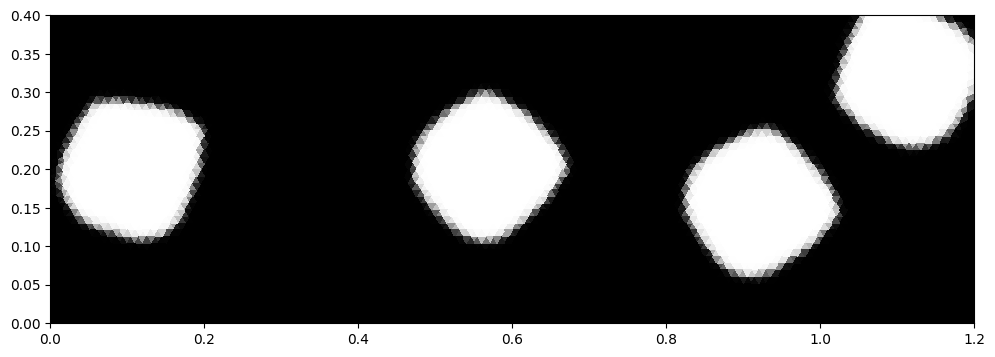

Iteration: 20 | current volfrac: 0.755876 | compliance: 0.000946
Iteration: 21 | current volfrac: 0.739331 | compliance: 0.000970
Iteration: 22 | current volfrac: 0.721416 | compliance: 0.001008
Iteration: 23 | current volfrac: 0.703139 | compliance: 0.001031
Iteration: 24 | current volfrac: 0.684825 | compliance: 0.001057
Iteration: 25 | current volfrac: 0.664606 | compliance: 0.001104
Iteration: 26 | current volfrac: 0.641092 | compliance: 0.001168
Iteration: 27 | current volfrac: 0.614669 | compliance: 0.001245
Iteration: 28 | current volfrac: 0.587841 | compliance: 0.001355
Iteration: 29 | current volfrac: 0.568565 | compliance: 0.001418
Iteration: 30 | current volfrac: 0.551606 | compliance: 0.001508
Iteration: 31 | current volfrac: 0.555026 | compliance: 0.001509
Iteration: 32 | current volfrac: 0.558182 | compliance: 0.001483
Iteration: 33 | current volfrac: 0.560659 | compliance: 0.001478
Iteration: 34 | current volfrac: 0.563845 | compliance: 0.001445
Iteration: 35 | current v

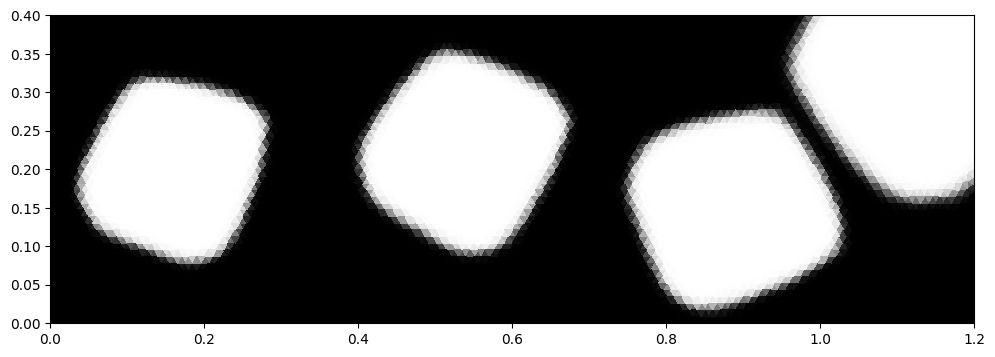

Iteration: 40 | current volfrac: 0.578272 | compliance: 0.001366
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.580022 | compliance: 0.001330
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.580202 | compliance: 0.001295
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.575341 | compliance: 0.001287
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.567232 | compliance: 0.001328
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.558009 | compliance: 0.001325
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.548414 | compliance: 0.001332
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.536733 | c

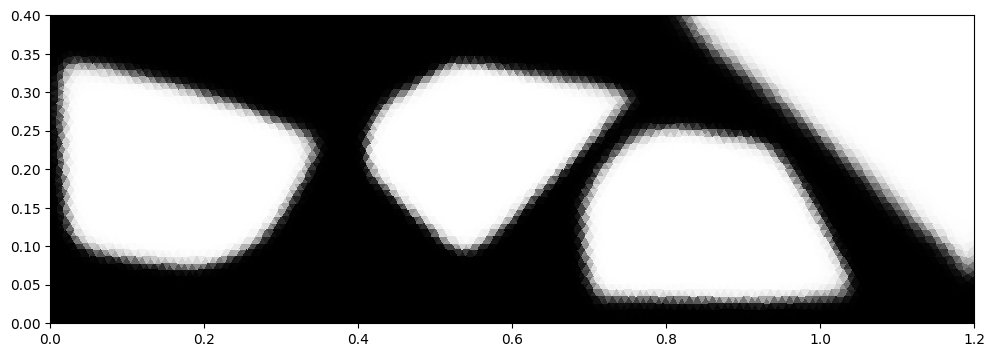

Iteration: 60 | current volfrac: 0.486981 | compliance: 0.001456
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.487183 | compliance: 0.001465
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.483303 | compliance: 0.001486
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.476729 | compliance: 0.001501
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.467095 | compliance: 0.001547
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.456116 | compliance: 0.001585
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.445486 | compliance: 0.001655
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.442747 | c

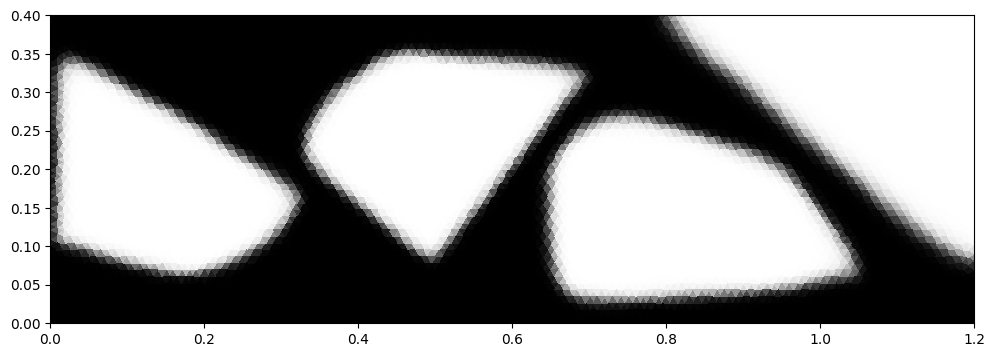

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 97039.49it/s]


0.5379551176966668 0.0011642781845750895


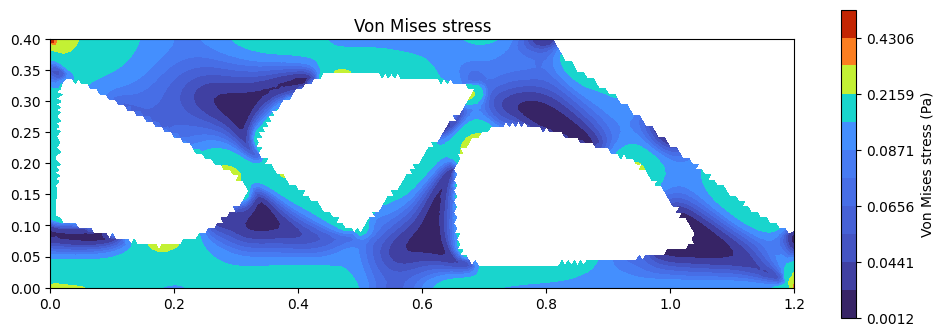

vf: 0.457816 | compliance: 0.001555 | max_stress: 0.537955
0.5379551176966668 0.0011642781845750895


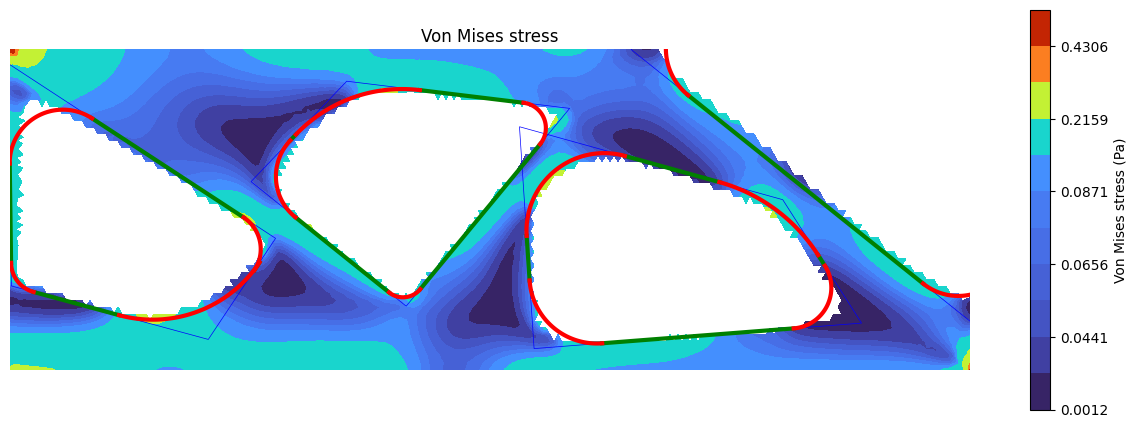

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 214668.95it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 20975.44it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
60
Iteration: 1 | current volfrac: 0.908073 | compliance: 0.000823
Iteration: 2 | current volfrac: 0.905115 | compliance: 0.000826
Iteration: 3 | current volfrac: 0.901019 | compliance: 0.000830
Iteration: 4 | current volfrac: 0.897149 | compliance: 0.000830
Iteration: 5 | current volfrac: 0.892958 | compliance: 0.000833
Iteration: 6 | current volfrac: 0.888303 | compliance: 0.000837
Iteration: 7 | current volfrac: 0.883477 | compliance: 0.000841
Iteration: 8 | current volfrac: 0.878062 | compliance: 0.000844
Iteration: 9 | current volfrac: 0.872164 | compliance: 0.000847
Iteration: 10 | current volfrac: 0.865961 | compliance: 0.000851
Iteration: 11 | current volfrac: 0.858985 | compliance: 0.000856
Iteration: 12 | current volfrac: 0.851783 | compliance: 0.000867
Iteration: 13 | current volfrac: 0.844979 | compliance: 0.000871
Iteration: 14 | current volfrac: 0.836971 | compliance: 0.0008

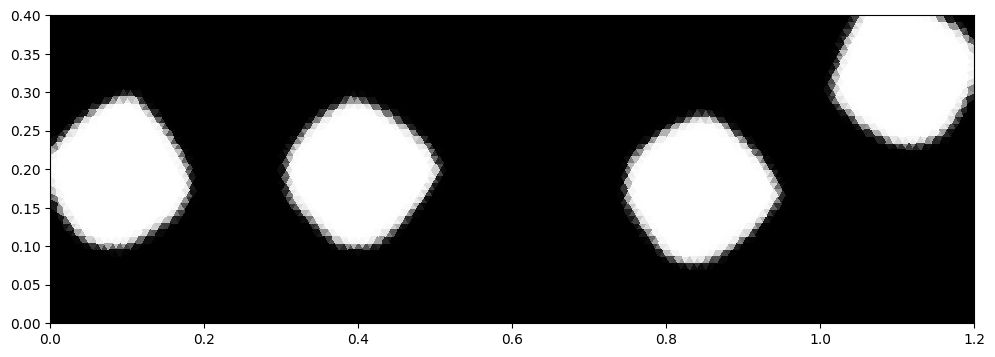

Iteration: 20 | current volfrac: 0.766416 | compliance: 0.000945
Iteration: 21 | current volfrac: 0.750324 | compliance: 0.000968
Iteration: 22 | current volfrac: 0.733066 | compliance: 0.000996
Iteration: 23 | current volfrac: 0.714418 | compliance: 0.001026
Iteration: 24 | current volfrac: 0.695112 | compliance: 0.001054
Iteration: 25 | current volfrac: 0.675271 | compliance: 0.001087
Iteration: 26 | current volfrac: 0.653207 | compliance: 0.001138
Iteration: 27 | current volfrac: 0.627863 | compliance: 0.001220
Iteration: 28 | current volfrac: 0.601545 | compliance: 0.001362
Iteration: 29 | current volfrac: 0.588772 | compliance: 0.001369
Iteration: 30 | current volfrac: 0.579090 | compliance: 0.001397
Iteration: 31 | current volfrac: 0.571570 | compliance: 0.001430
Iteration: 32 | current volfrac: 0.567129 | compliance: 0.001459
Iteration: 33 | current volfrac: 0.566176 | compliance: 0.001472
Iteration: 34 | current volfrac: 0.567599 | compliance: 0.001460
Iteration: 35 | current v

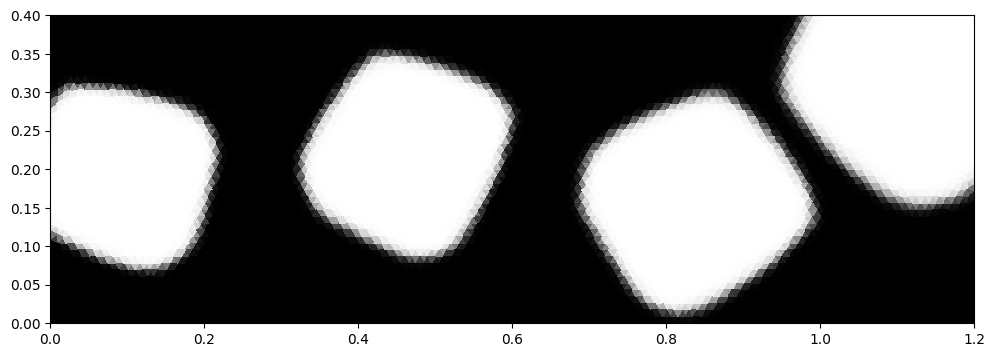

Iteration: 40 | current volfrac: 0.560840 | compliance: 0.001434
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.560957 | compliance: 0.001404
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.561986 | compliance: 0.001369
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.561275 | compliance: 0.001338
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.555926 | compliance: 0.001359
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.546588 | compliance: 0.001357
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.534252 | compliance: 0.001379
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.521451 | c

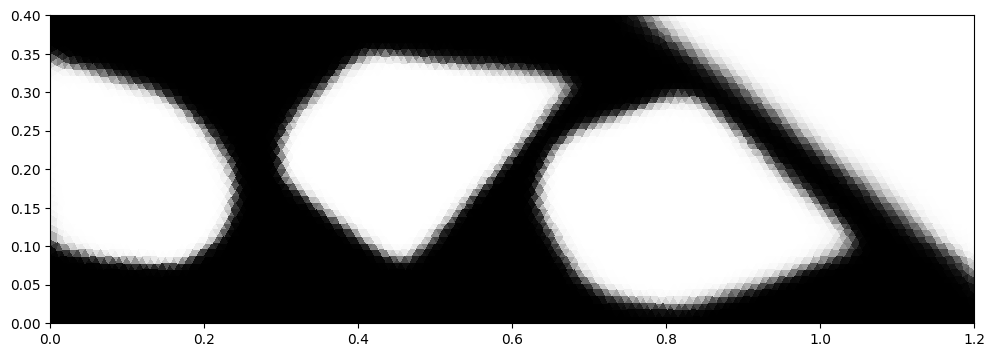

Iteration: 60 | current volfrac: 0.460655 | compliance: 0.001571
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.455902 | compliance: 0.001575
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.451258 | compliance: 0.001586
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.445934 | compliance: 0.001609
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.462408 | compliance: 0.001580
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.458005 | compliance: 0.001566
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.453014 | compliance: 0.001581
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.449132 | c

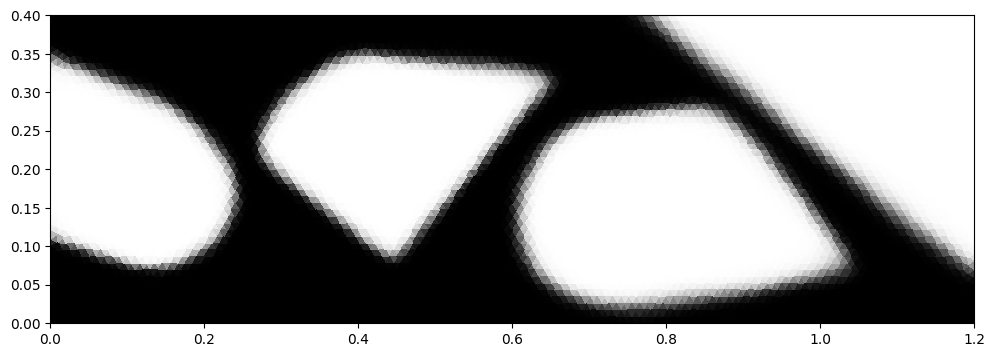

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 85197.44it/s]


0.5538344253984051 0.0010335299848382802


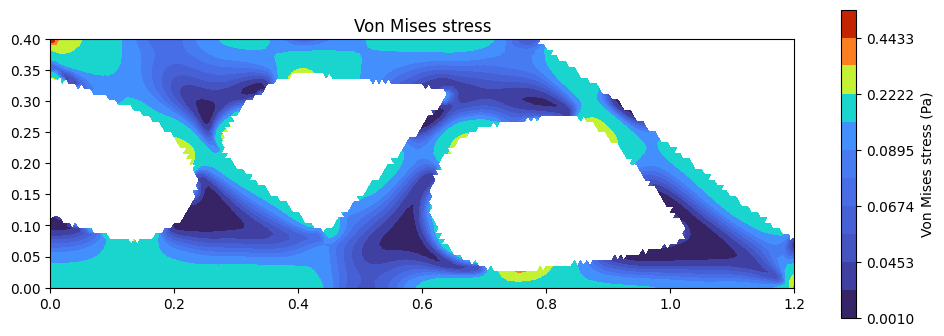

vf: 0.453342 | compliance: 0.001596 | max_stress: 0.602792
0.5538344253984051 0.0010335299848382802


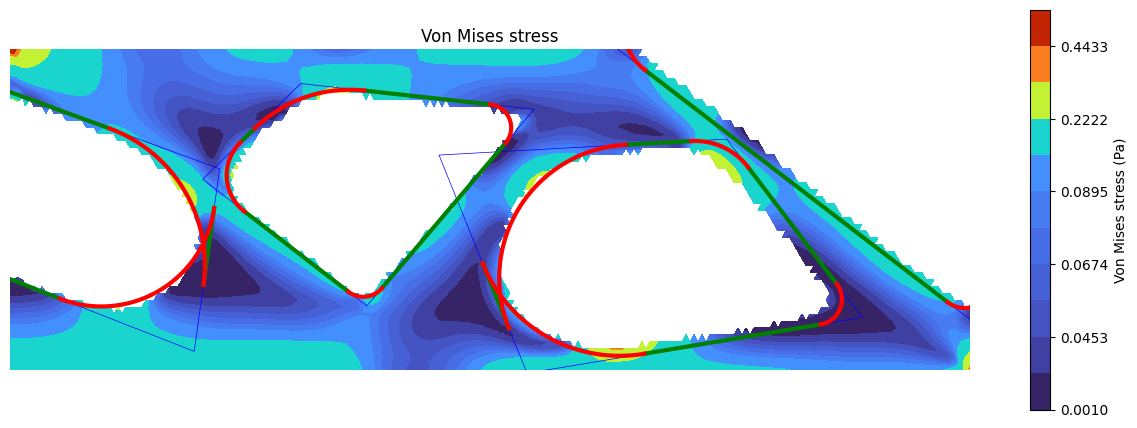

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 212865.60it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 33876.28it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
80
Iteration: 1 | current volfrac: 0.913366 | compliance: 0.000808
Iteration: 2 | current volfrac: 0.910395 | compliance: 0.000812
Iteration: 3 | current volfrac: 0.906271 | compliance: 0.000816
Iteration: 4 | current volfrac: 0.902332 | compliance: 0.000815
Iteration: 5 | current volfrac: 0.898115 | compliance: 0.000818
Iteration: 6 | current volfrac: 0.893381 | compliance: 0.000823
Iteration: 7 | current volfrac: 0.888536 | compliance: 0.000826
Iteration: 8 | current volfrac: 0.883196 | compliance: 0.000827
Iteration: 9 | current volfrac: 0.877298 | compliance: 0.000828
Iteration: 10 | current volfrac: 0.870922 | compliance: 0.000829
Iteration: 11 | current volfrac: 0.863983 | compliance: 0.000832
Iteration: 12 | current volfrac: 0.856628 | compliance: 0.000837
Iteration: 13 | current volfrac: 0.848269 | compliance: 0.000845
Iteration: 14 | current volfrac: 0.839560 | compliance: 0.0008

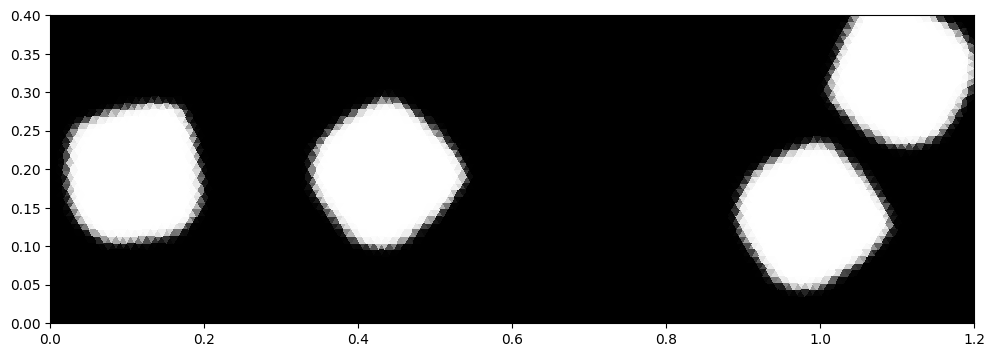

Iteration: 20 | current volfrac: 0.769092 | compliance: 0.000922
Iteration: 21 | current volfrac: 0.753172 | compliance: 0.000938
Iteration: 22 | current volfrac: 0.736618 | compliance: 0.000951
Iteration: 23 | current volfrac: 0.718583 | compliance: 0.000973
Iteration: 24 | current volfrac: 0.698003 | compliance: 0.001005
Iteration: 25 | current volfrac: 0.674205 | compliance: 0.001052
Iteration: 26 | current volfrac: 0.647396 | compliance: 0.001128
Iteration: 27 | current volfrac: 0.618665 | compliance: 0.001230
Iteration: 28 | current volfrac: 0.592481 | compliance: 0.001328
Iteration: 29 | current volfrac: 0.573308 | compliance: 0.001387
Iteration: 30 | current volfrac: 0.558752 | compliance: 0.001446
Iteration: 31 | current volfrac: 0.548269 | compliance: 0.001519
Iteration: 32 | current volfrac: 0.557240 | compliance: 0.001475
Iteration: 33 | current volfrac: 0.565592 | compliance: 0.001423
Iteration: 34 | current volfrac: 0.572707 | compliance: 0.001376
Iteration: 35 | current v

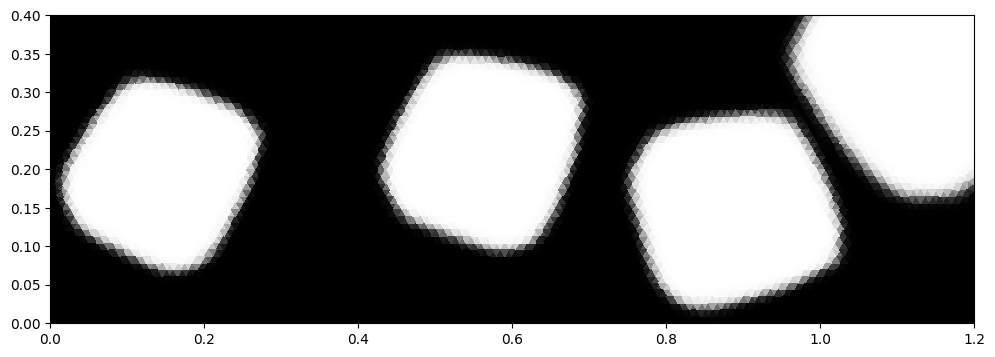

Iteration: 40 | current volfrac: 0.583530 | compliance: 0.001311
Global iteration 40 is within one of the shape optimization ranges.
Iteration: 41 | current volfrac: 0.583388 | compliance: 0.001287
Global iteration 41 is within one of the shape optimization ranges.
Iteration: 42 | current volfrac: 0.579065 | compliance: 0.001273
Global iteration 42 is within one of the shape optimization ranges.
Iteration: 43 | current volfrac: 0.569392 | compliance: 0.001279
Global iteration 43 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 44 | current volfrac: 0.566952 | compliance: 0.001315
Global iteration 44 is within one of the shape optimization ranges.
Iteration: 45 | current volfrac: 0.561226 | compliance: 0.001278
Global iteration 45 is within one of the shape optimization ranges.
Iteration: 46 | current volfrac: 0.551479 | compliance: 0.001297
Global iteration 46 is within one of the shape optimization ranges.
Iteration: 47 | current volfrac: 0.536625 | c

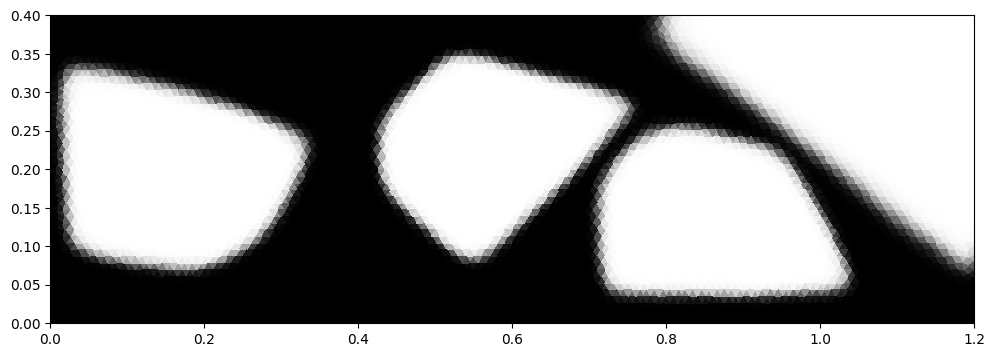

Iteration: 60 | current volfrac: 0.475487 | compliance: 0.001528
Global iteration 60 is within one of the shape optimization ranges.
Iteration: 61 | current volfrac: 0.477551 | compliance: 0.001471
Global iteration 61 is within one of the shape optimization ranges.
Iteration: 62 | current volfrac: 0.478505 | compliance: 0.001464
Global iteration 62 is within one of the shape optimization ranges.
Iteration: 63 | current volfrac: 0.476544 | compliance: 0.001490
Global iteration 63 is within one of the shape optimization ranges.
Refactoring started ...
Iteration: 64 | current volfrac: 0.476231 | compliance: 0.001516
Global iteration 64 is within one of the shape optimization ranges.
Iteration: 65 | current volfrac: 0.471016 | compliance: 0.001520
Global iteration 65 is within one of the shape optimization ranges.
Iteration: 66 | current volfrac: 0.465397 | compliance: 0.001522
Global iteration 66 is within one of the shape optimization ranges.
Iteration: 67 | current volfrac: 0.459696 | c

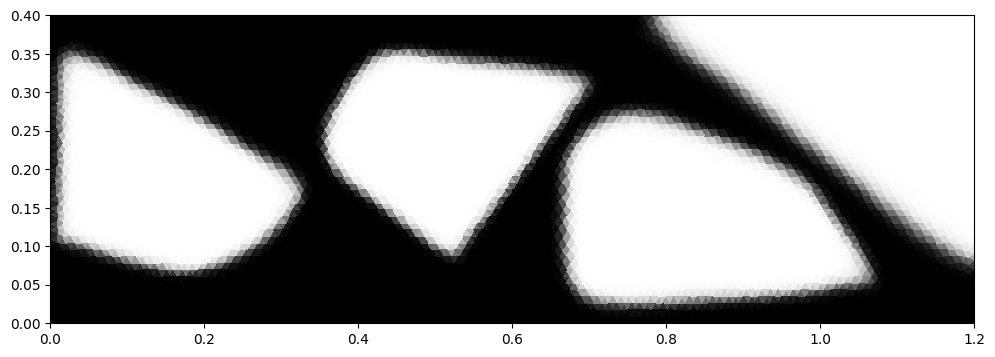

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 87103.69it/s]


0.5178698342170983 0.0027477206226819238


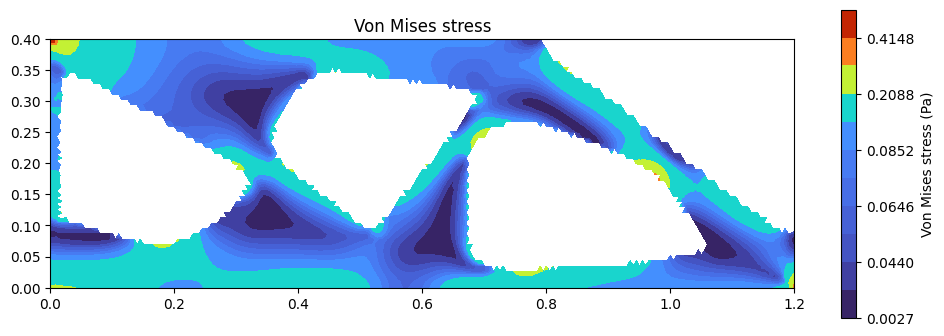

vf: 0.454542 | compliance: 0.001538 | max_stress: 0.520430
0.5178698342170983 0.0027477206226819238


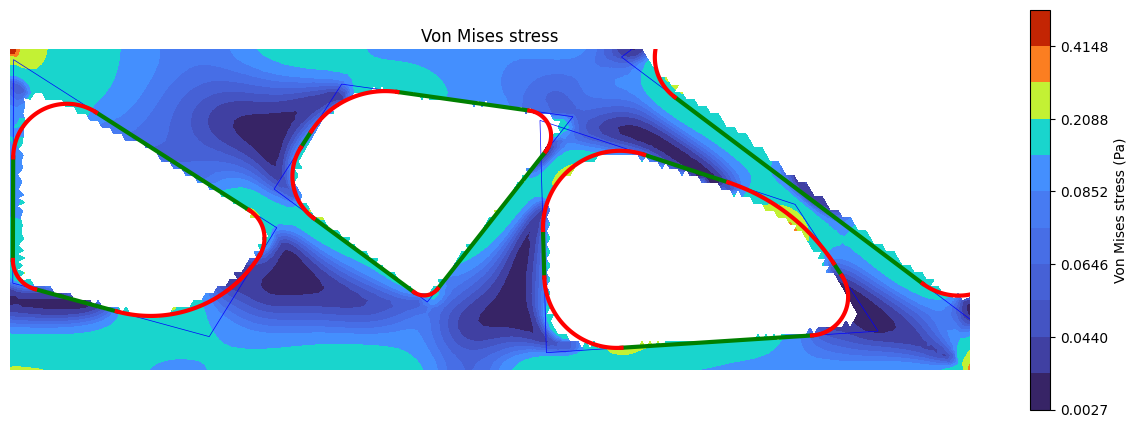

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 202458.23it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 33723.51it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
100


/home/kalexu97/Projects/carpenter-sdf-topology-optimizer/NN_TopOpt/TopOpt.py:315: RuntimeWarning: invalid value encountered in multiply
  sK=(self.K_sep.T*(self.Emin+(xPhys)**self.penal*(self.Emax-self.Emin))).flatten(order='F')


RuntimeError: failed to factorize matrix at line 406 in file ../scipy/sparse/linalg/_dsolve/SuperLU/SRC/dpanel_bmod.c


In [7]:

config_name = "MBB_beam_half_fm_ae_hv" #
task_name = "Beam"


config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
params['refactoring_markers'] = list(range(38, 80, 5))

metrics = {
    "vf": [],
    "compliance": [],
    "max_stress": [],
    "H_min": [],
    "H_max": [],
    "filename": [],
}

root_dir = "../src/gamma_ks_test"
os.makedirs(root_dir, exist_ok=True)

task_dir = f"{root_dir}/{config_name}"
os.makedirs(task_dir, exist_ok=True)

for gamma_ks in gamma_ks_list:
    vf, compliance, max_stress, filename, H_min, H_max = gamma_ks_experiment(gamma_ks, methods, params, task_dir)

    metrics["vf"].append(vf)
    metrics["compliance"].append(compliance)
    metrics["max_stress"].append(max_stress)
    metrics["H_min"].append(H_min)
    metrics["H_max"].append(H_max)
    metrics["filename"].append(filename)


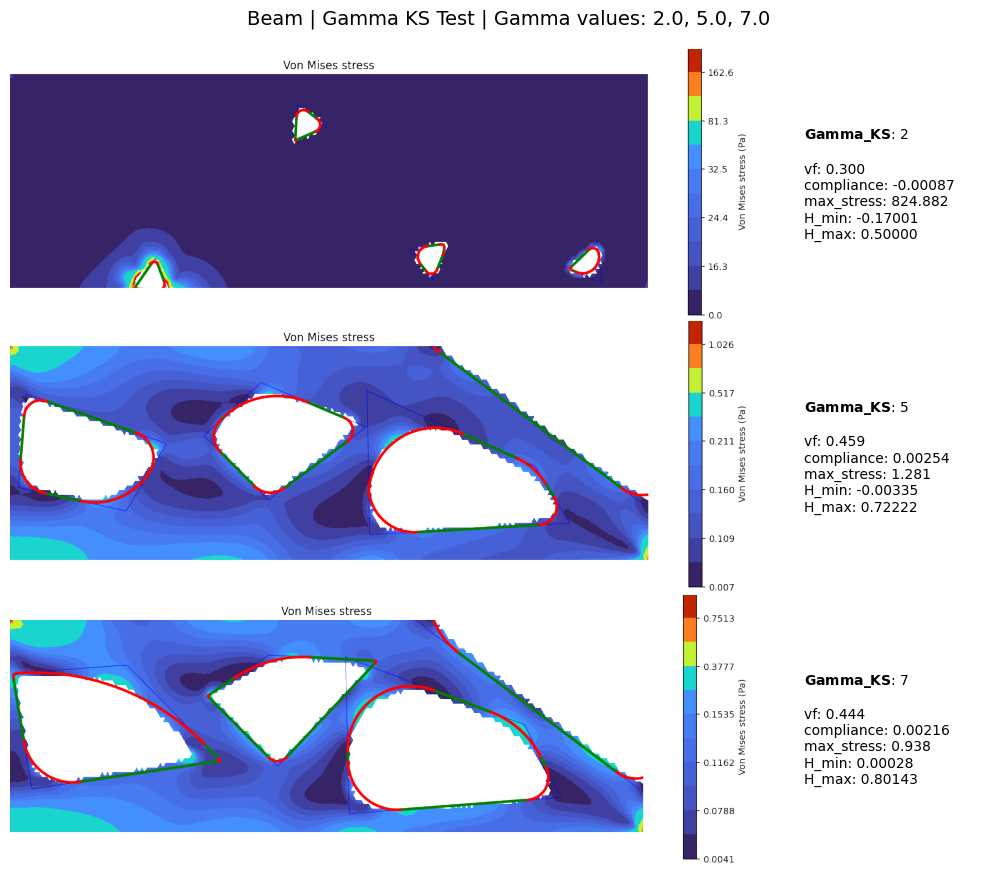

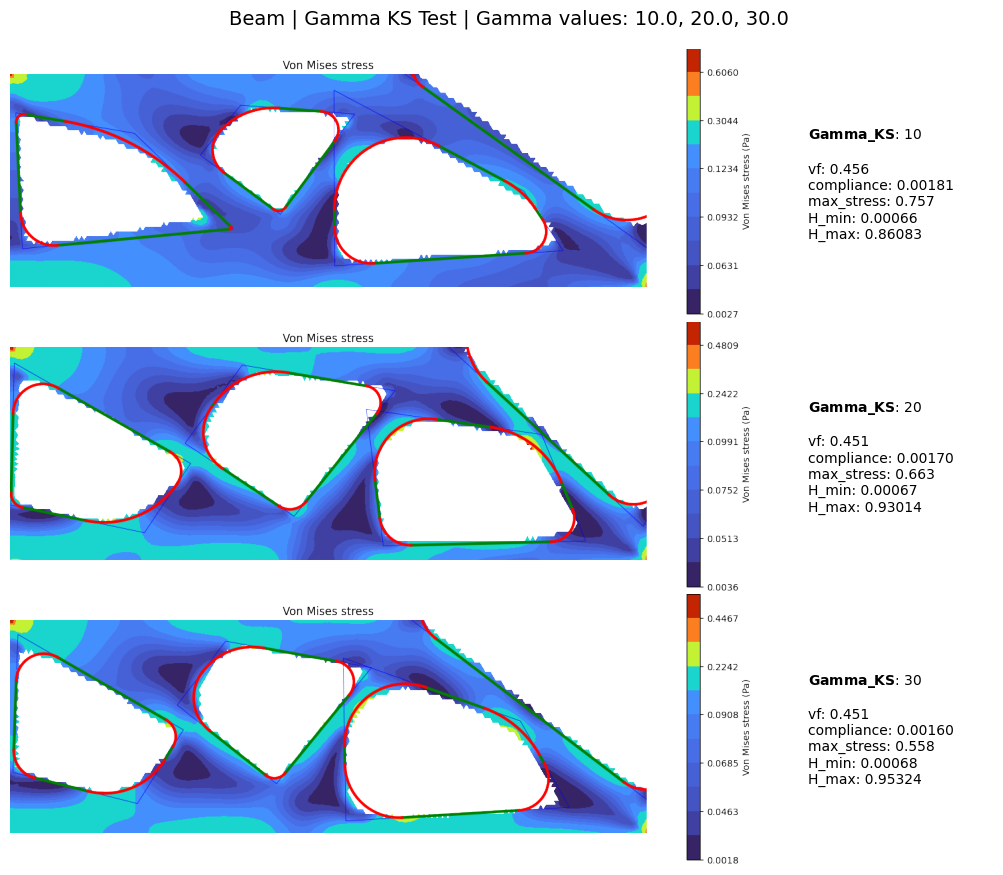

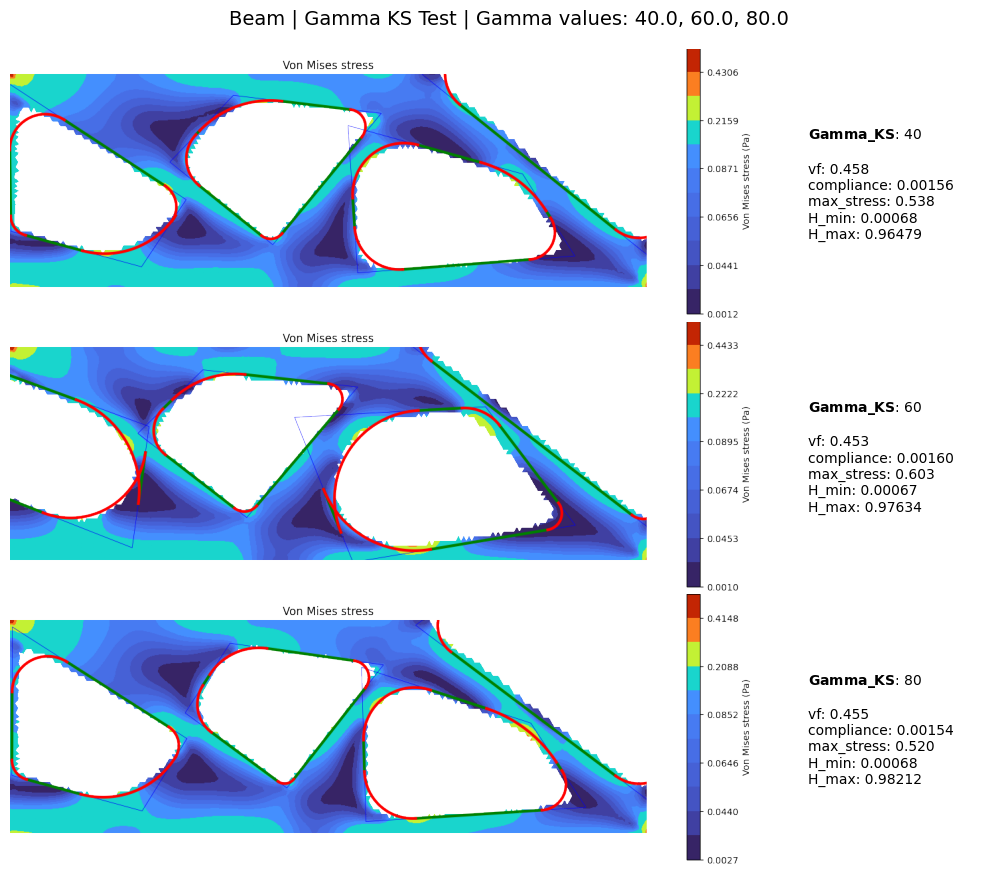

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

num_experiments_per_plot = 3
num_experiments = len(metrics["filename"])
plot_scale = 2

# Split experiments into chunks with a maximum length of num_experiments_per_plot
for start_idx in range(0, num_experiments, num_experiments_per_plot):
    end_idx = min(start_idx + num_experiments_per_plot, num_experiments)
    current_chunk = end_idx - start_idx

    # Create a new figure for the current chunk.
    fig, axes = plt.subplots(
        current_chunk, 2,
        figsize=(5 * plot_scale, 1.4 * current_chunk * plot_scale),
        gridspec_kw={'width_ratios': [3, 1]}
    )
    # Ensure axes is 2D even if there is only one experiment in the chunk.
    if current_chunk == 1:
        axes = np.array([axes])
    
    for idx in range(current_chunk):
        global_idx = start_idx + idx
        
        # Left column: load and display the image from the corresponding filename.
        ax_img = axes[idx, 0]
        img = mpimg.imread(metrics["filename"][global_idx])
        ax_img.imshow(img)
        ax_img.axis('off')
        
        # Right column: display metric values with gamma_ks as the title.
        ax_text = axes[idx, 1]
        metric_text = (
            f"$\\mathbf{{Gamma\\_KS}}$: {gamma_ks_list[global_idx]}\n"
            f"\n"
            f"vf: {metrics['vf'][global_idx]:.3f}\n"
            f"compliance: {metrics['compliance'][global_idx]:.5f}\n"
            f"max_stress: {metrics['max_stress'][global_idx]:.3f}\n"
            f"H_min: {metrics['H_min'][global_idx]:.5f}\n"
            f"H_max: {metrics['H_max'][global_idx]:.5f}"
        )
        ax_text.text(0.25, 0.5, metric_text, ha='left', va='center', fontsize=10)
        ax_text.axis('off')
    
    # Set a suptitle for the current chunk showing its gamma values.
    gamma_values_str = ", ".join([f"{gamma:.1f}" for gamma in gamma_ks_list[start_idx:end_idx]])
    fig.suptitle(f"{task_name} | Gamma KS Test | Gamma values: {gamma_values_str}", fontsize=14, y=1.02)
    
    plt.tight_layout(pad=0.1, w_pad=0.0, h_pad=0.1)
    plt.show()


In [11]:
# save the metrics to a json file
import json

def serialize_tensor(o):
    import torch
    if isinstance(o, torch.Tensor):
        return o.item() if o.numel() == 1 else o.tolist()
    raise TypeError(f"Object of type {o.__class__.__name__} is not JSON serializable")

with open(f"{task_dir}/metrics.json", "w") as file:
    json.dump(metrics, file, default=serialize_tensor)

In [ ]:

# config_name = "MBB_beam_half_fm_ae_hv" #
config_name = "Cant_beam_half_fm_ae_hv"
task_name = "Cantilever Beam"


config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
params['refactoring_markers'] = list(range(38, 80, 5))

metrics = {
    "vf": [],
    "compliance": [],
    "max_stress": [],
    "H_min": [],
    "H_max": [],
    "filename": [],
}

root_dir = "../src/gamma_ks_test"
os.makedirs(root_dir, exist_ok=True)

task_dir = f"{root_dir}/{config_name}"
os.makedirs(task_dir, exist_ok=True)

for gamma_ks in gamma_ks_list:
    vf, compliance, max_stress, filename, H_min, H_max = gamma_ks_experiment(gamma_ks, methods, params, task_dir)

    metrics["vf"].append(vf)
    metrics["compliance"].append(compliance)
    metrics["max_stress"].append(max_stress)
    metrics["H_min"].append(H_min)
    metrics["H_max"].append(H_max)
    metrics["filename"].append(filename)

    # break


Info    : Reading '../test_problems/cantilever_beam_high_resolution.msh'...
Info    : 9 entities
Info    : 7142 nodes
Info    : 13942 elements
Info    : Done reading '../test_problems/cantilever_beam_high_resolution.msh'
Compute areas ...


100%|██████████| 13942/13942 [00:00<00:00, 216876.22it/s]


Whole area 0.15


100%|██████████| 13942/13942 [00:00<00:00, 31019.61it/s]


Fixed case:  fixed_xy [0, [0, 0.6]] 121 7142
Loaded loads:  (10,)
2
Iteration: 1 | current volfrac: 0.365442 | compliance: 0.000234
Iteration: 2 | current volfrac: 0.379656 | compliance: 0.000230
Iteration: 3 | current volfrac: 0.389603 | compliance: 0.000241
Iteration: 4 | current volfrac: 0.399999 | compliance: 0.000216
Iteration: 5 | current volfrac: 0.408235 | compliance: 0.000234
Iteration: 6 | current volfrac: 0.414733 | compliance: 0.000201
